# Classical Unsupervised Learning

Unsupervised machine learning is when the user steps back and trusts the computer's intuition in finding patterns and correlations within the data. We have discussed different methods for classical unsupervised learning (pre-deep learning) and will utilise these on an artificial dataset to see how they work and where they fall short. To do this we will be using various modules from the `scikit-learn` python package. Like all machine learning, classical unsupervised learning aims to approximate a function

$$ y = f (x) $$

where $y$ is the output and $x$ is the data. However, in the unsupervised case, the data $x$ is known but the outcomes $y$ are not known. This is determined by what kind of algorithm you want to apply to your data: whether it be clustering, dimensionality reduction or classification. Unsupervised learning puts an emphasis on hyperparameter tuning to understand the results you get and the results you want.

In [1]:
%matplotlib notebook
%config InlineBackend.figure_format = "retina"

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from itertools import combinations, product

The data is to be used for the first set of exercises is saved to this repository in the `data.npz` file which is the same `.npz` file format we used last week. Load in this data and inspect it.

* What is the shape of the data?
* What does this tell you about the number of features that describes the data?
* What do 2D projections of the of the data look like (try plotting the different combinations of axes in 2D)?
* How many different types of data is there?

In [2]:
data = np.load("data.npz")["data"]

## Exercise 1: Dimensionality Reduction using Principal Component Analysis

Principal Component Analysis (PCA) is a dimensionality reduction technique which finds the *natural* basis for the data and finds the affine transformation required to translate to this basis in which each prinicpal component has maximum variance. Each principal component can be thought of as a linear combination of the features defining the data.

The first thing to do is to find out the importance of each of the n principal components for our dataset where an n-dimensional dataset can be described by n principal components. This can be done by applying a PCA fit to our dataset and looking at the `explained_variance_ratio_` attribute of our object.

The `scikit-learn` documentation for PCA can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [3]:
pca = PCA()
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

We can plot the results of `explained_variance_ratio_` against the label for each principal component using a bar chart. This will show us what principal components are important for describing the data in the dataset. That is, we want to be able to express the data, $D$ as

$$ D \approx \sum_{i = 1}^{m} d_{i} \hat{x}_{i}$$

where m<n, $d_{i}$ is the data value in the direction of the ith principal component and $\hat{x}_{i}$ is the unit vector for the ith principal component. An example code for plotting the principal components is given below.

<IPython.core.display.Javascript object>


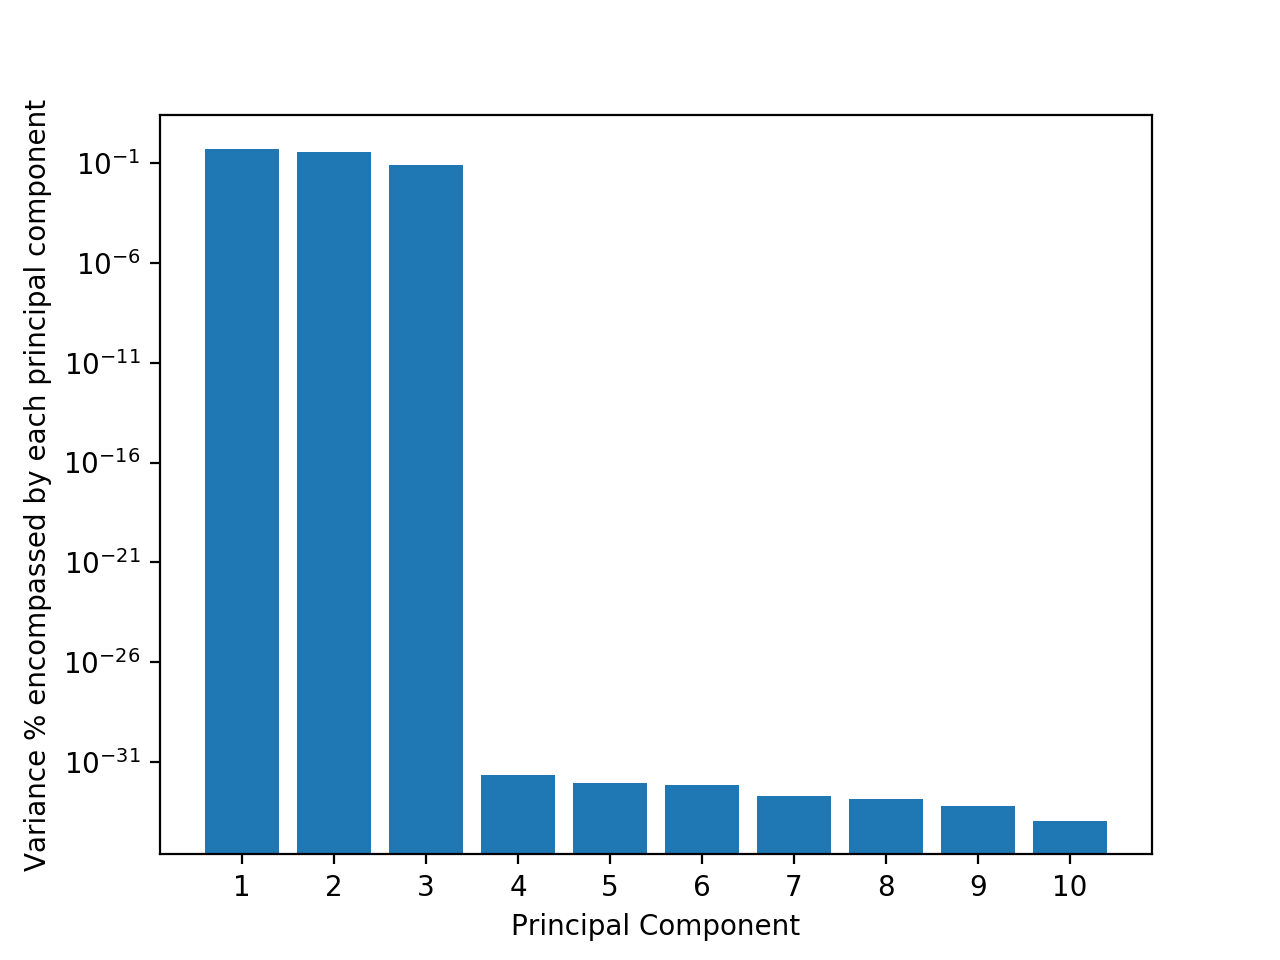

Text(0.5, 0, 'Principal Component')

In [4]:
plt.figure()
plt.bar(np.arange(10),pca.explained_variance_ratio_,tick_label=np.arange(10)+1)
plt.yscale("log")
plt.ylabel("Variance % encompassed by each principal component")
plt.xlabel("Principal Component")

Hint: you may want to plot the most important principal components on a linear to see the relative importance between them.

<IPython.core.display.Javascript object>


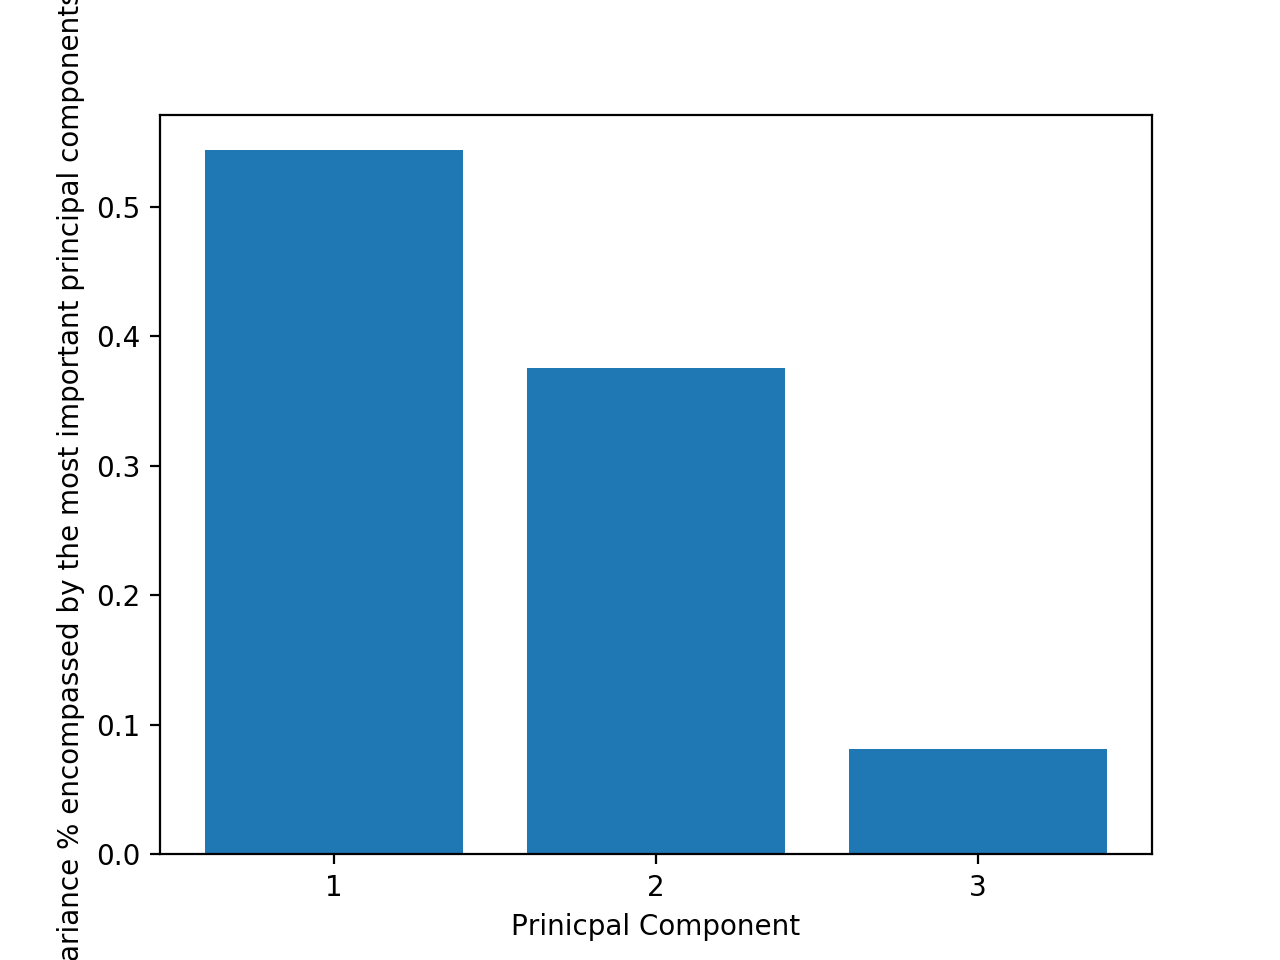

Text(0.5, 0, 'Prinicpal Component')

In [5]:
plt.figure()
plt.bar(np.arange(3),pca.explained_variance_ratio_[:3],tick_label=np.arange(3)+1)
plt.ylabel("Variance % encompassed by the most important principal components")
plt.xlabel("Prinicpal Component")

A good rule of thumb is that any sum of principal components that corresponds to more than 95% of the variance in the system are good enough to describe your system of data. That is, we discard the dimensions that make up very little of the variation in our data. We can then use the PCA object to reduce the size of the dataset to be described by the samples expressed in the basis of the most important principal components (the number of which will be set by you).

In [6]:
pca.n_components = 3
data_reduced = pca.fit_transform(data)

After successfully reducing the dimensions of your data, try plotting the permutations of the principal components to see which gives you the best view of the data.

<IPython.core.display.Javascript object>


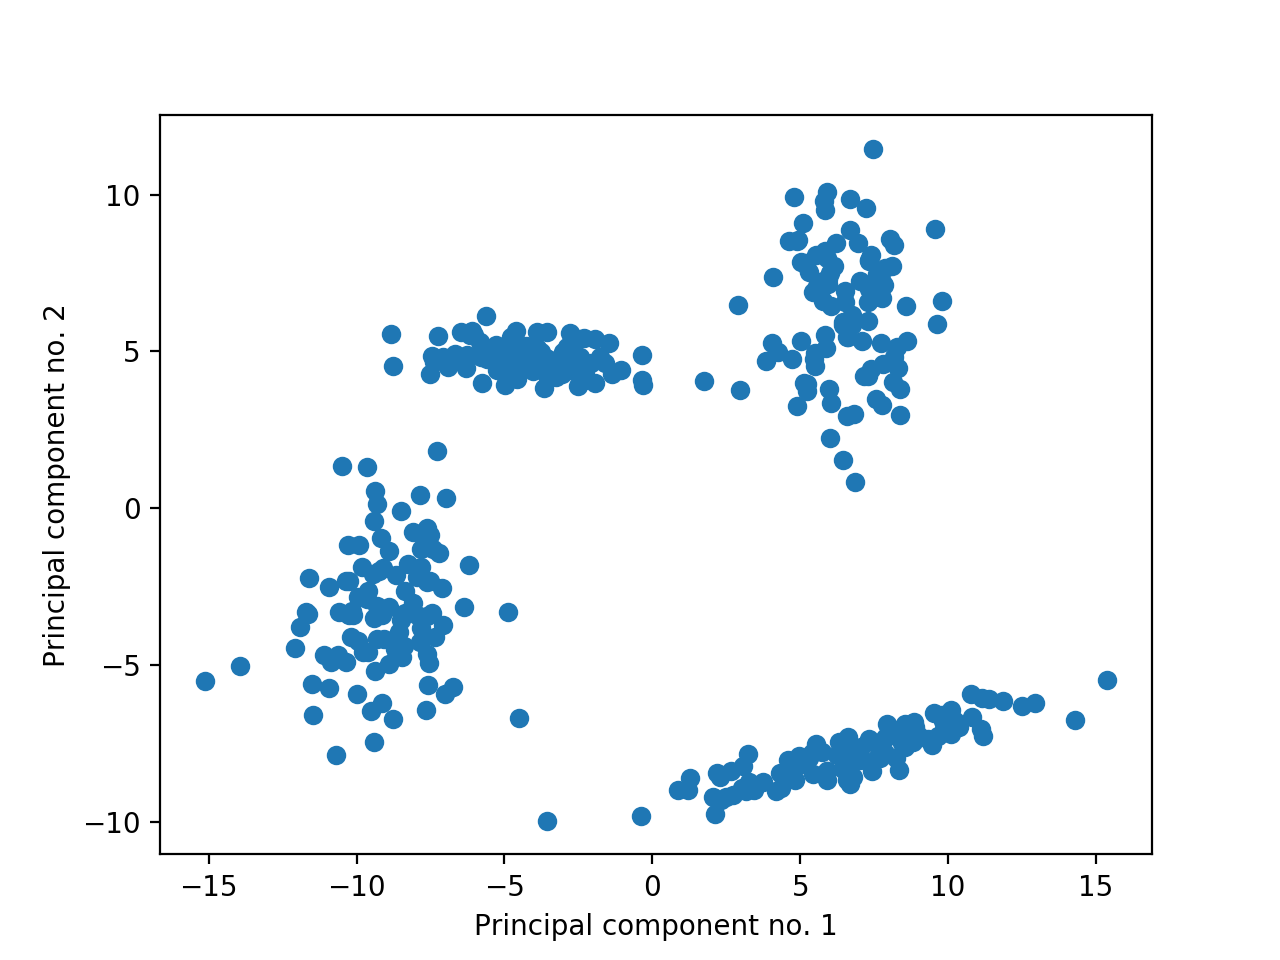

<IPython.core.display.Javascript object>


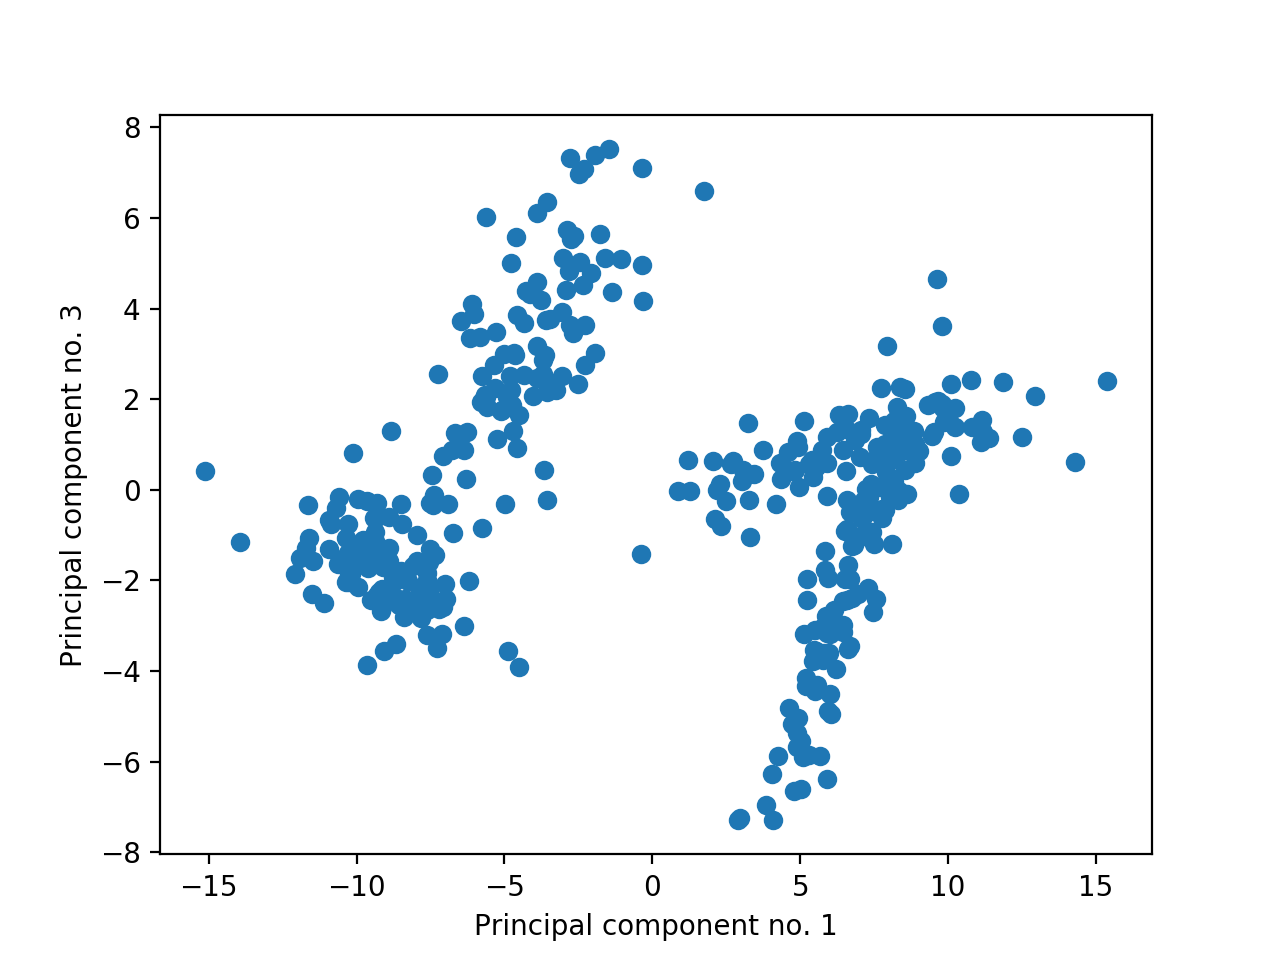

<IPython.core.display.Javascript object>


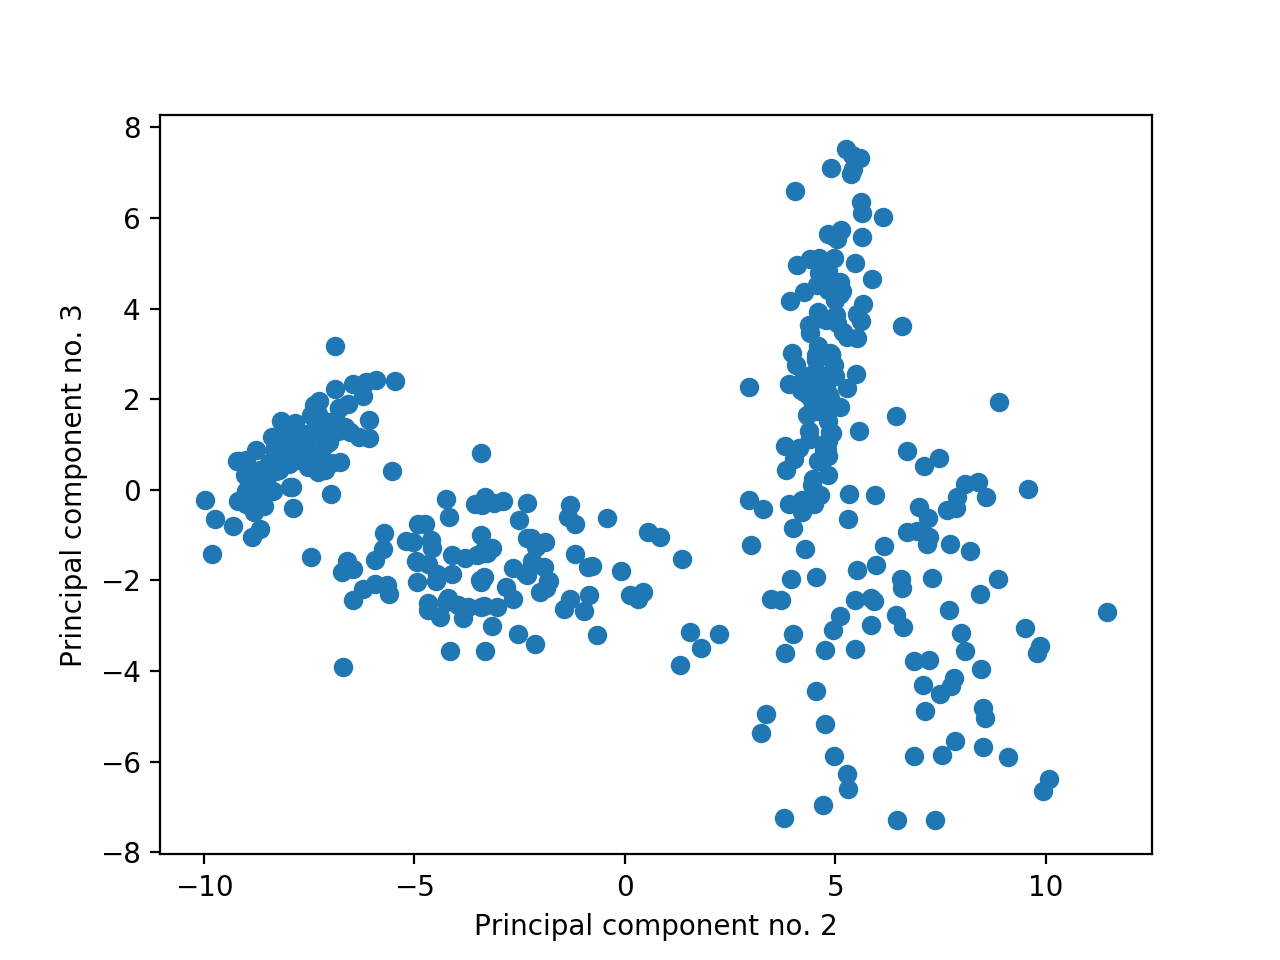

In [7]:
perms = list(combinations(np.arange(3)+1,2))

for i, (x,y) in enumerate(perms):
    plt.figure(i+1)
    plt.scatter(data_reduced[:,x-1],data_reduced[:,y-1])
    plt.xlabel("Principal component no. %s" % x)
    plt.ylabel("Principal component no. %s" % y)

**Questions to be answered:**

1. What is the best permuted visualisation of the data in terms of the principal components that encompass the most variance?
2. Do 2D projections of the original data make it obvious where the prinipal components lie?
3. What led you to the choices you made for the most important principal components of the data?

## Exercise 2: K-Means Clustering

Now that we can see what the data looks like when expressed in terms of its most important principal components, we can see the true separation of the classes. Our next job is to cluster the data using two different algorithms: K-Means and hierarchical clustering.

K-Means clustering is similar to the K-nearest neighbours classification scheme we saw in the supervised portion of the course. We define K different clusters that we suspect to be in our dataset. These clusters are defined by the mean of the data within them $\mu_{j}$ which is often called the cluster centroid. These centroids are randomly initialised and the algorithm aims to place them at the minimum of the inertia of the system

$$ \sum_{i = 0}^{n} \text{min} || x_{i} - \mu_{j} ||_{\mu_{j} \in C}^{2} $$

that is for each cluster mean, the algorithm assigns a point to that cluster based on if it has the minimum distance to it and arranges the clusters such that each point is only closest to one centroid. The algorithm does this in three steps:

1. Assign each point to a centroid.
2. Create new centroids by taking the average of all points in the clusters.
3. The difference between these centroids is then calculated and steps 1 & 2 are repeated until this difference is below the defined threshold -- i.e. until the centroids are stable.

In [8]:
km = KMeans(n_clusters=4)
km.fit(data_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
y_pred = km.predict(data_reduced)
centroids = km.cluster_centers_

<IPython.core.display.Javascript object>


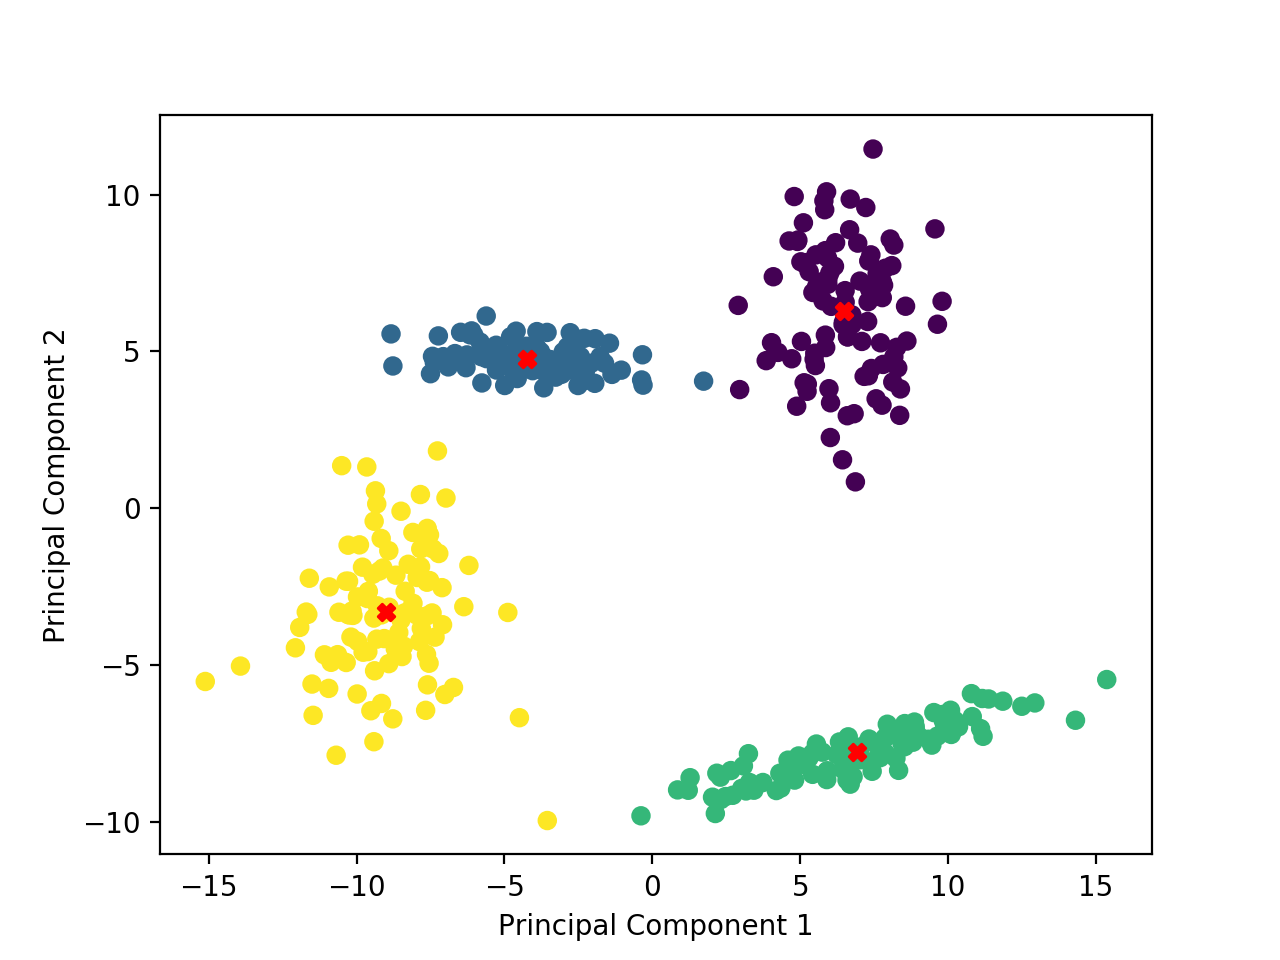

Text(0, 0.5, 'Principal Component 2')

In [10]:
plt.figure()
plt.scatter(data_reduced[:,0],data_reduced[:,1],c=y_pred)
plt.scatter(centroids[:,0],centroids[:,1],marker="X",color="r")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

In [11]:
km.score(data_reduced)

-4029.835982771673

In [17]:
k = [2,3,4,5,6,7]
scores = []
for c in k:
    scores.append(np.abs(KMeans(n_clusters=c).fit(data_reduced).score(data_reduced)))

<IPython.core.display.Javascript object>


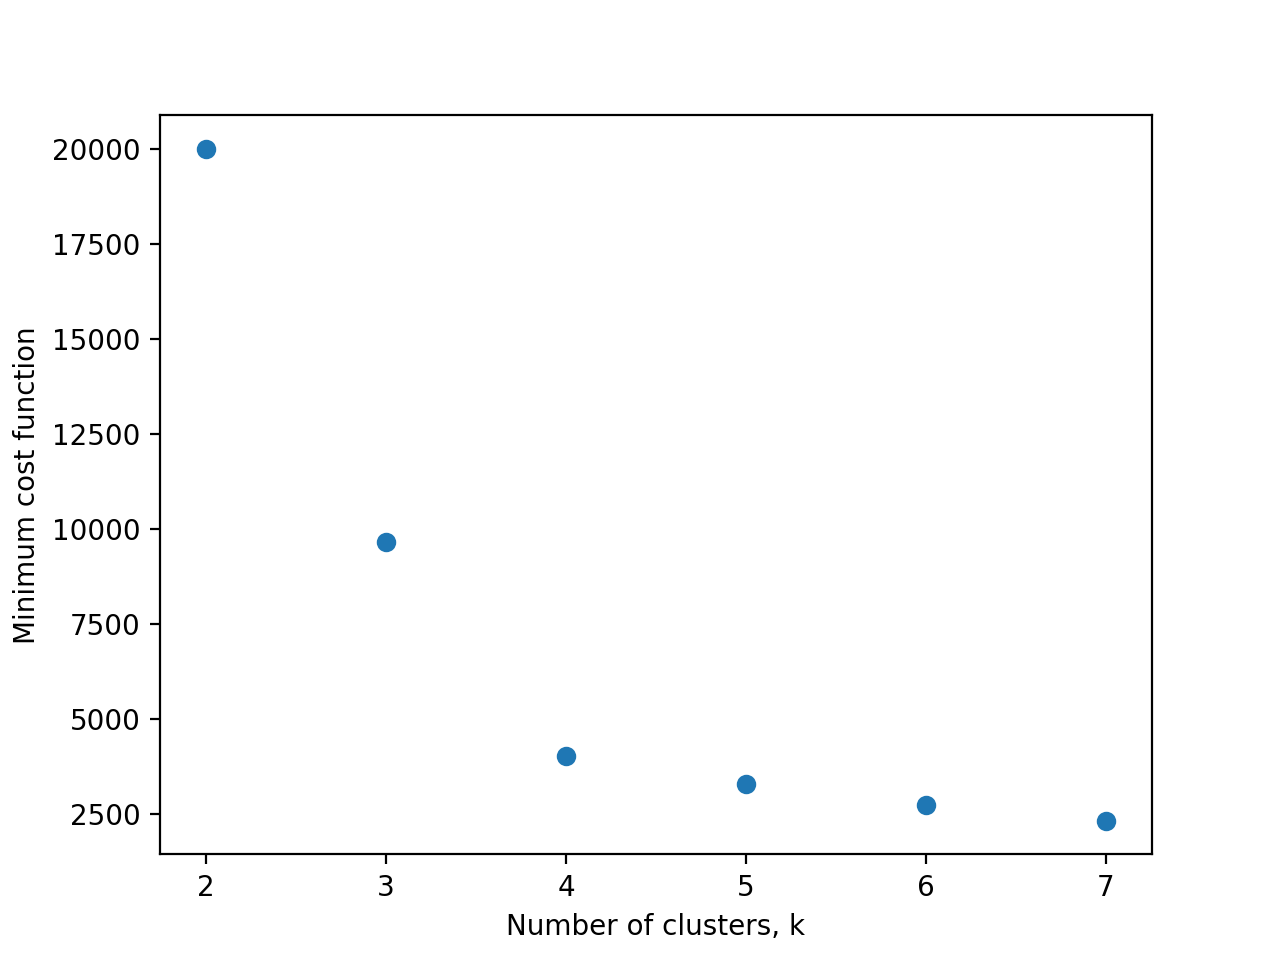

Text(0.5, 0, 'Number of clusters, k')

In [19]:
plt.figure()
plt.scatter(k,scores)
plt.ylabel("Minimum cost function")
plt.xlabel("Number of clusters, k")

**Questions to be answered:**

1. What happens to the positions of the centroids when they are initialised in different ways?
2. Does increasing/decreasing the number of centroids change the clusters in the way you would expect?

## Exercise 3: Hierarchical Clustering

Here we use agglomerative clustering which is where we start with each data point being a cluster, and with our defined distance metric calculate the pairwise distance between each points. Following this, we take the two closest clusters and via our linkage method and merge them to become a new cluster. This algorithm concludes when all data points are part of one large cluster.

Note: *divisive* clustering also exits. This is where we start with all data points being in one cluster and do the reverse. However, this has problems when splitting the data into smaller clusters as it is difficult to define the right heuristic to use to separate these clusters. As a result, agglomerative clustering is the preferred method.

Try different linkage methods, affinities and cluster numbers and see how changing these hyperparameters changes the clustering results. It should be obvious from the previous plot what the number of clusters should be but this may not always be obvious with your data so it's nice to see how the algorithm works with more or less clusters than is actually needed. Documentation for agglomerative clustering can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).

In [36]:
links = ["single","average","complete"]
metric = ["euclidean","minkowski","cityblock"]

In [37]:
prods = list(product(links,metric))
prods.append(("ward","euclidean"))
clustering = []
for i, (x,y) in enumerate(prods):
    Z = linkage(data_reduced,method=x,metric=y)
    clustering.append(Z)

[Dendrograms](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html) are a good way to visualise the connections made by your agglomerative clustering algorithm. Perform clustering several times using different combinations of linkages and metrics to see which gives you the best answer. The best answer can be seen in the dendrogram i.e. make plots of each dendrogram and see which gives you the desired result.

<IPython.core.display.Javascript object>


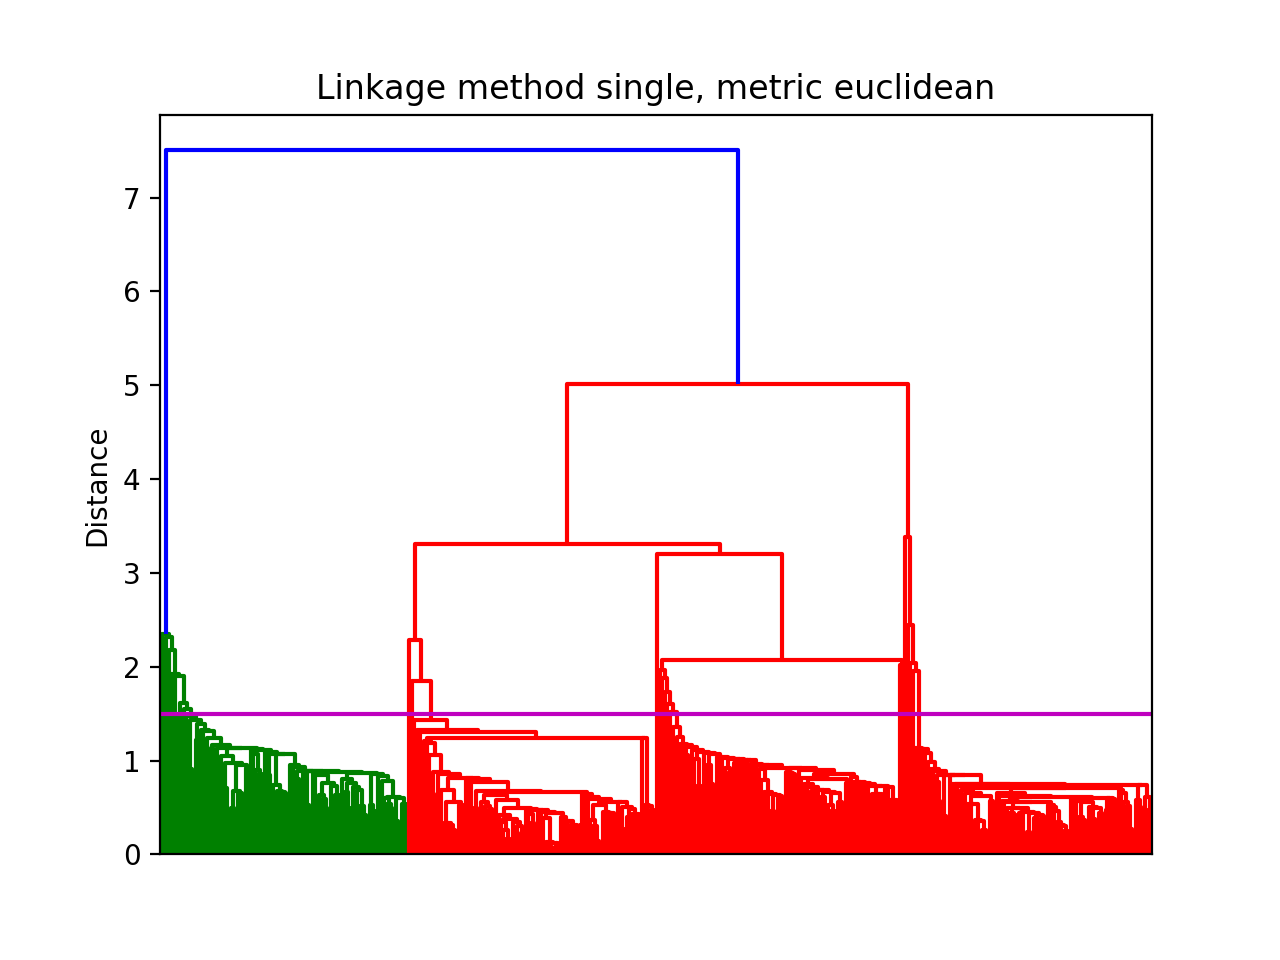

<IPython.core.display.Javascript object>


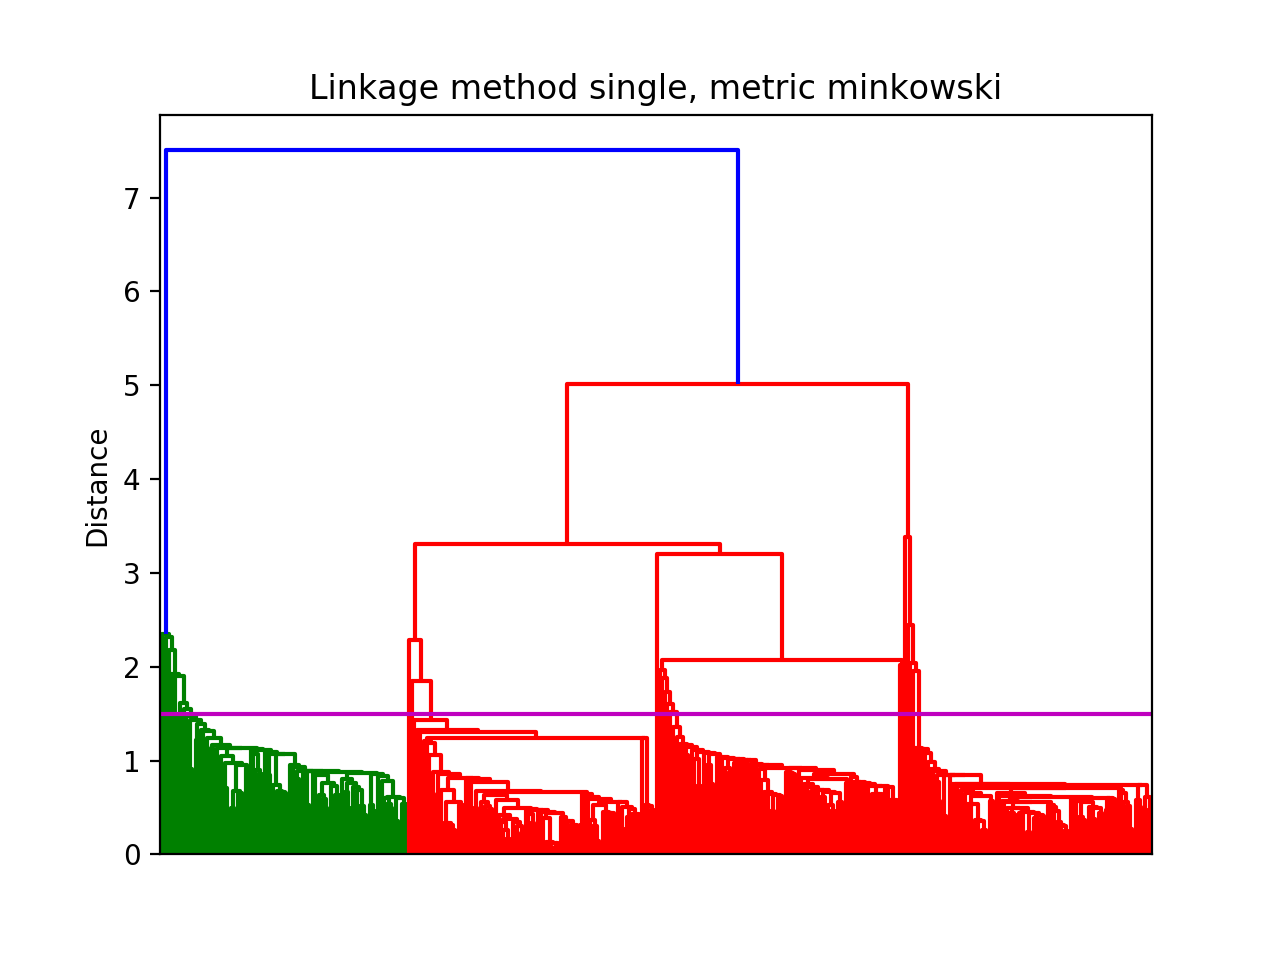

<IPython.core.display.Javascript object>


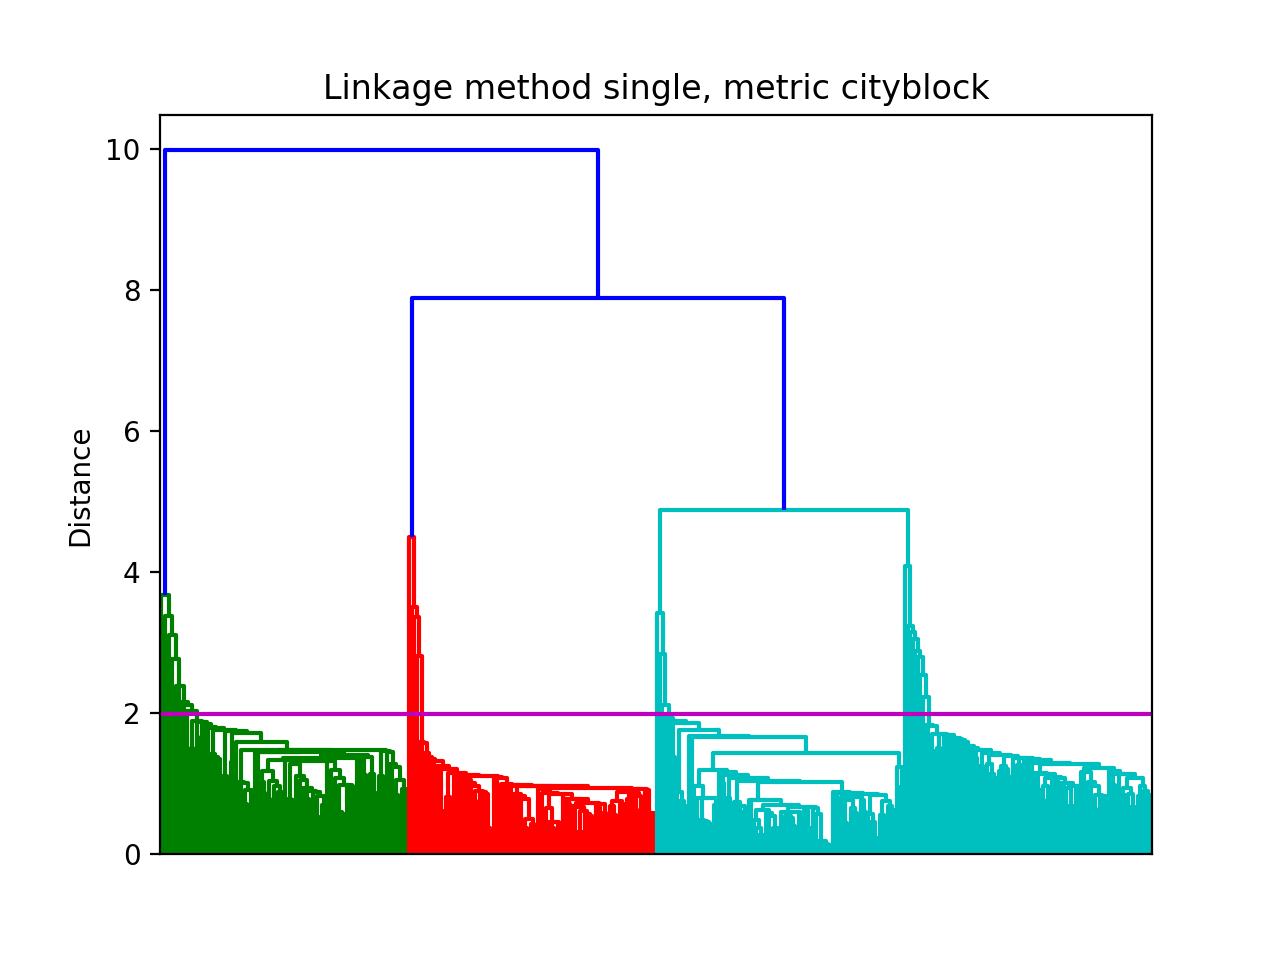

<IPython.core.display.Javascript object>


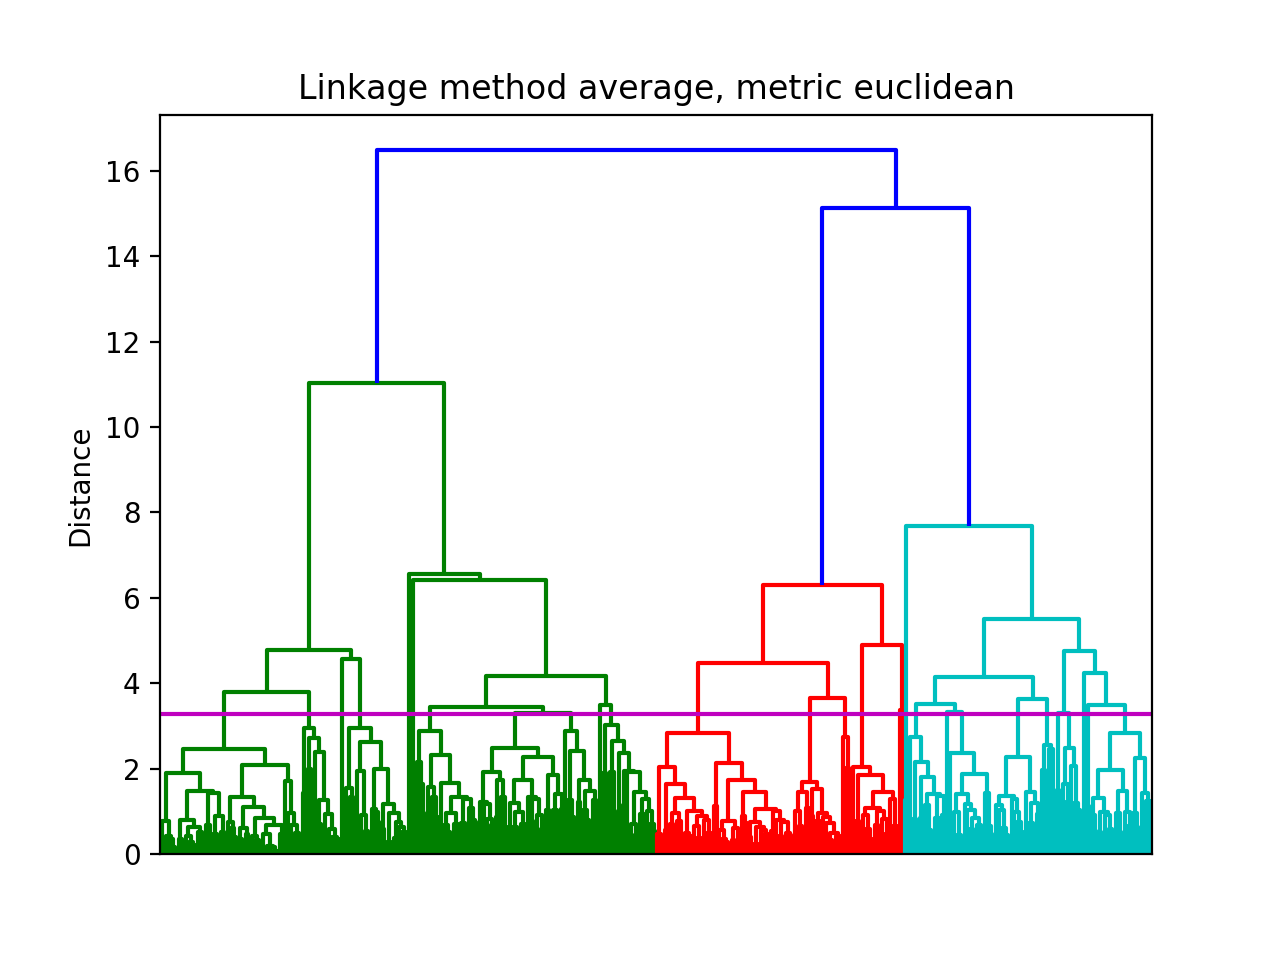

<IPython.core.display.Javascript object>


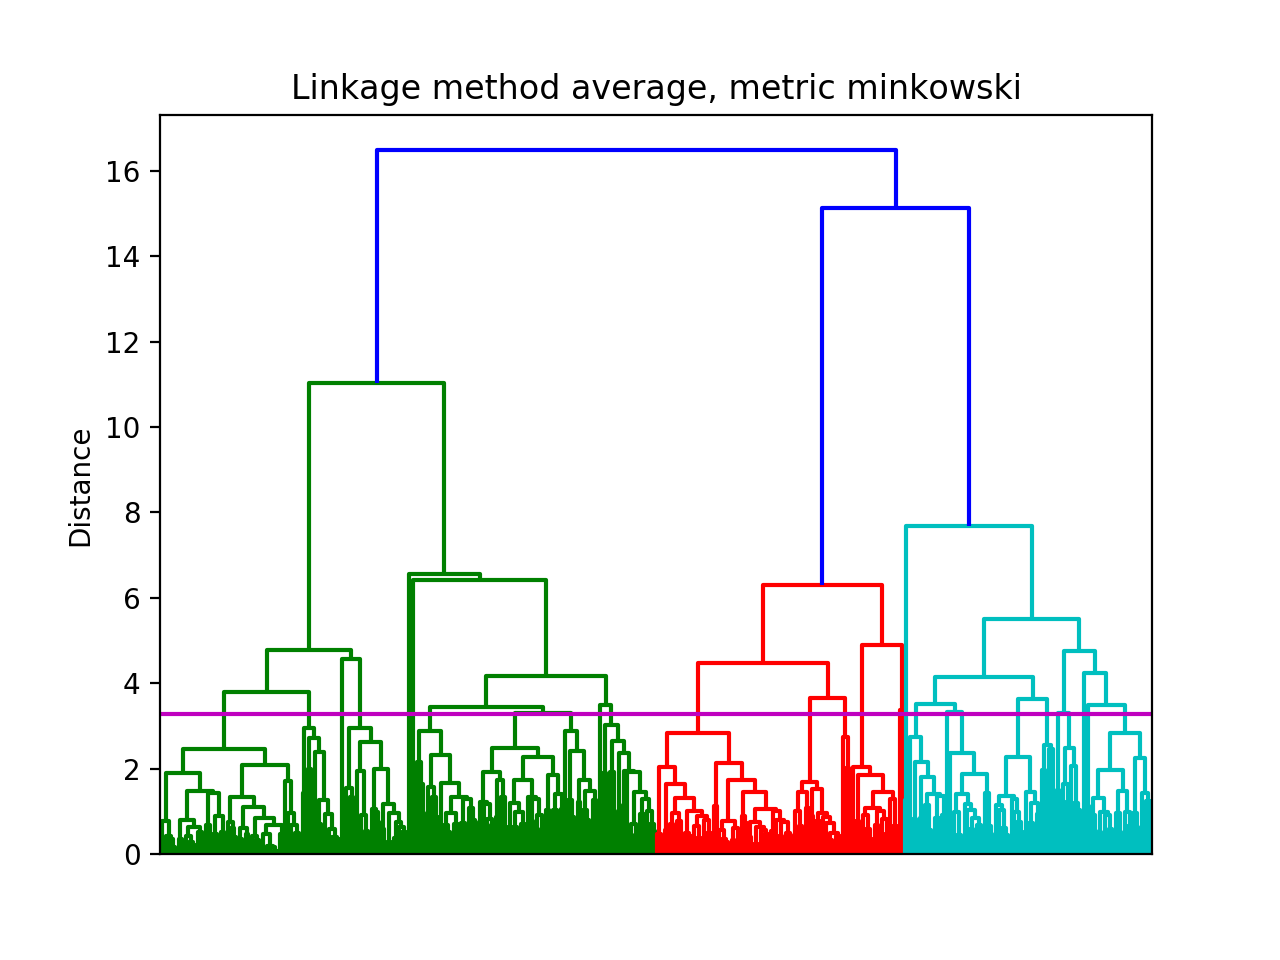

<IPython.core.display.Javascript object>


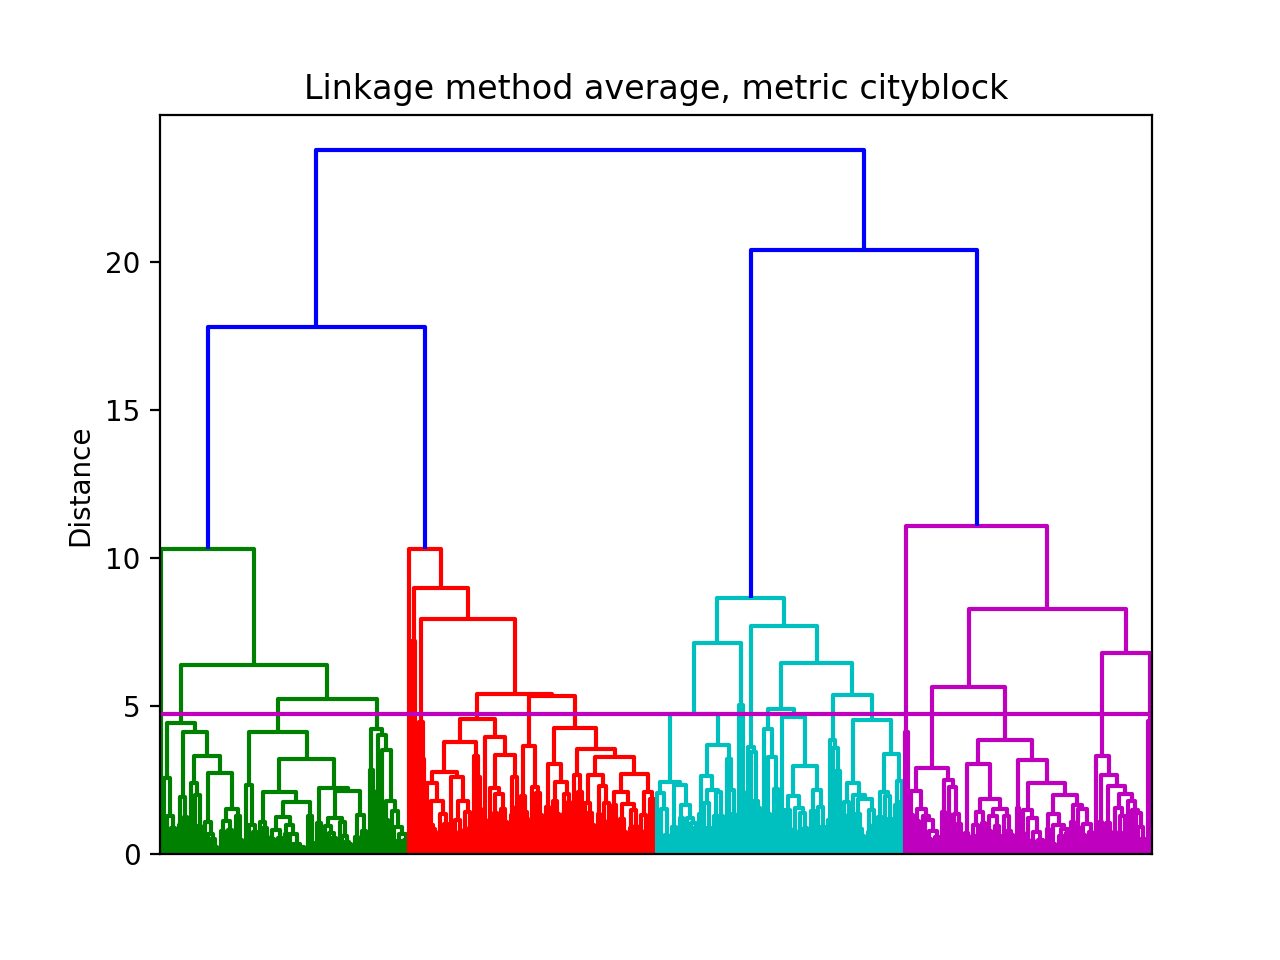

<IPython.core.display.Javascript object>


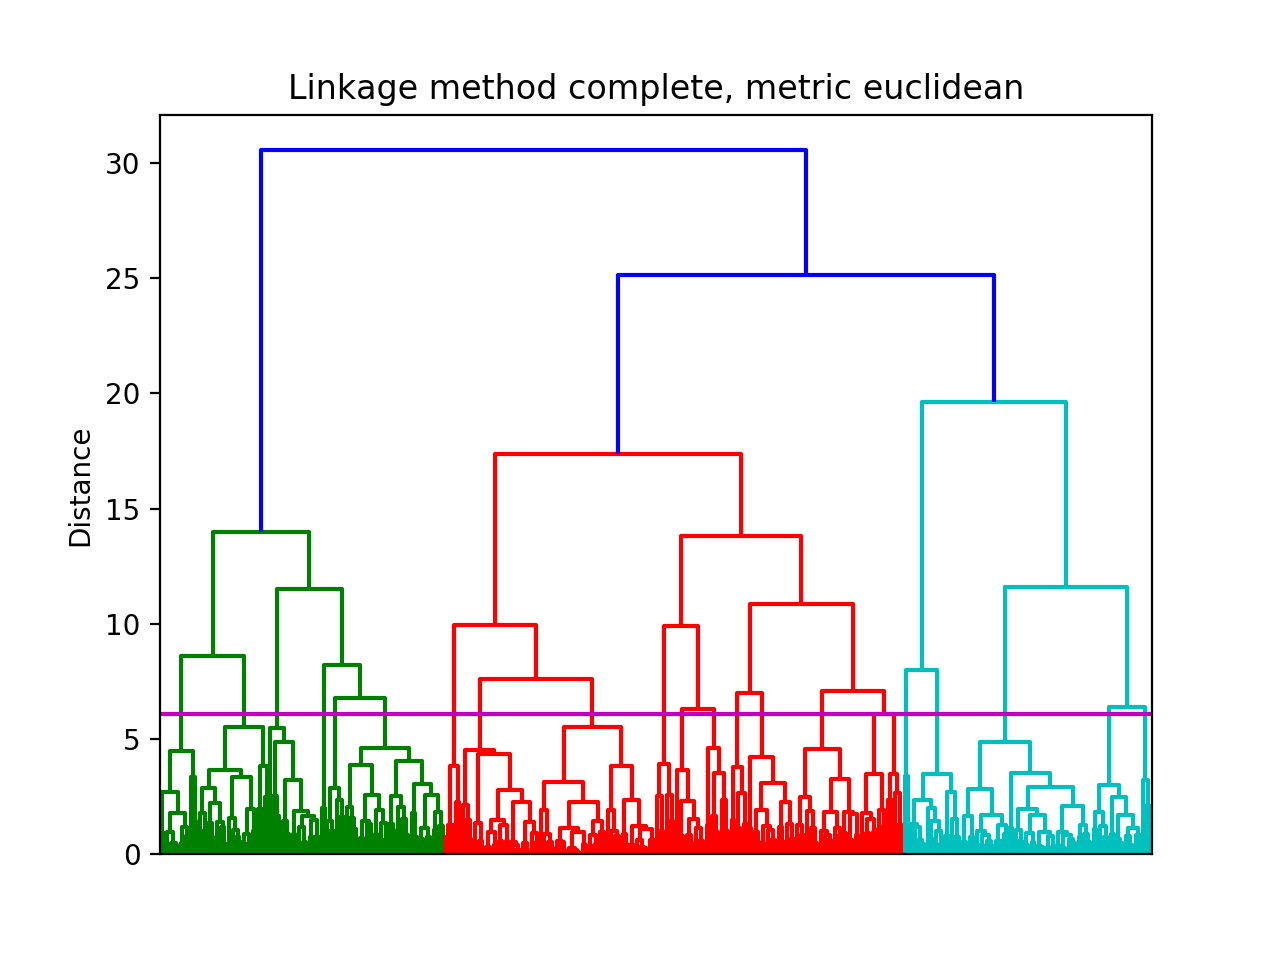

<IPython.core.display.Javascript object>


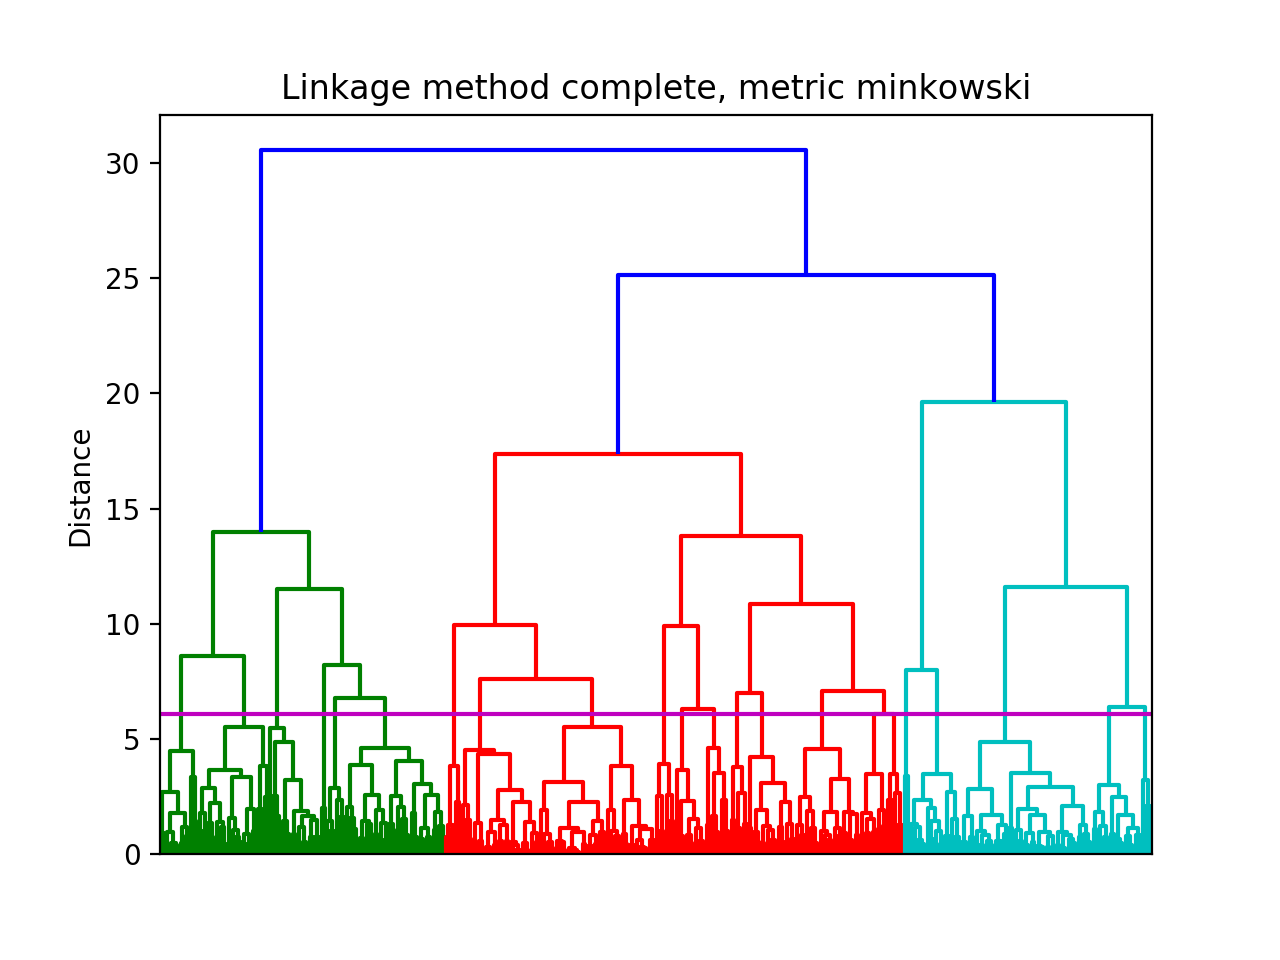

<IPython.core.display.Javascript object>


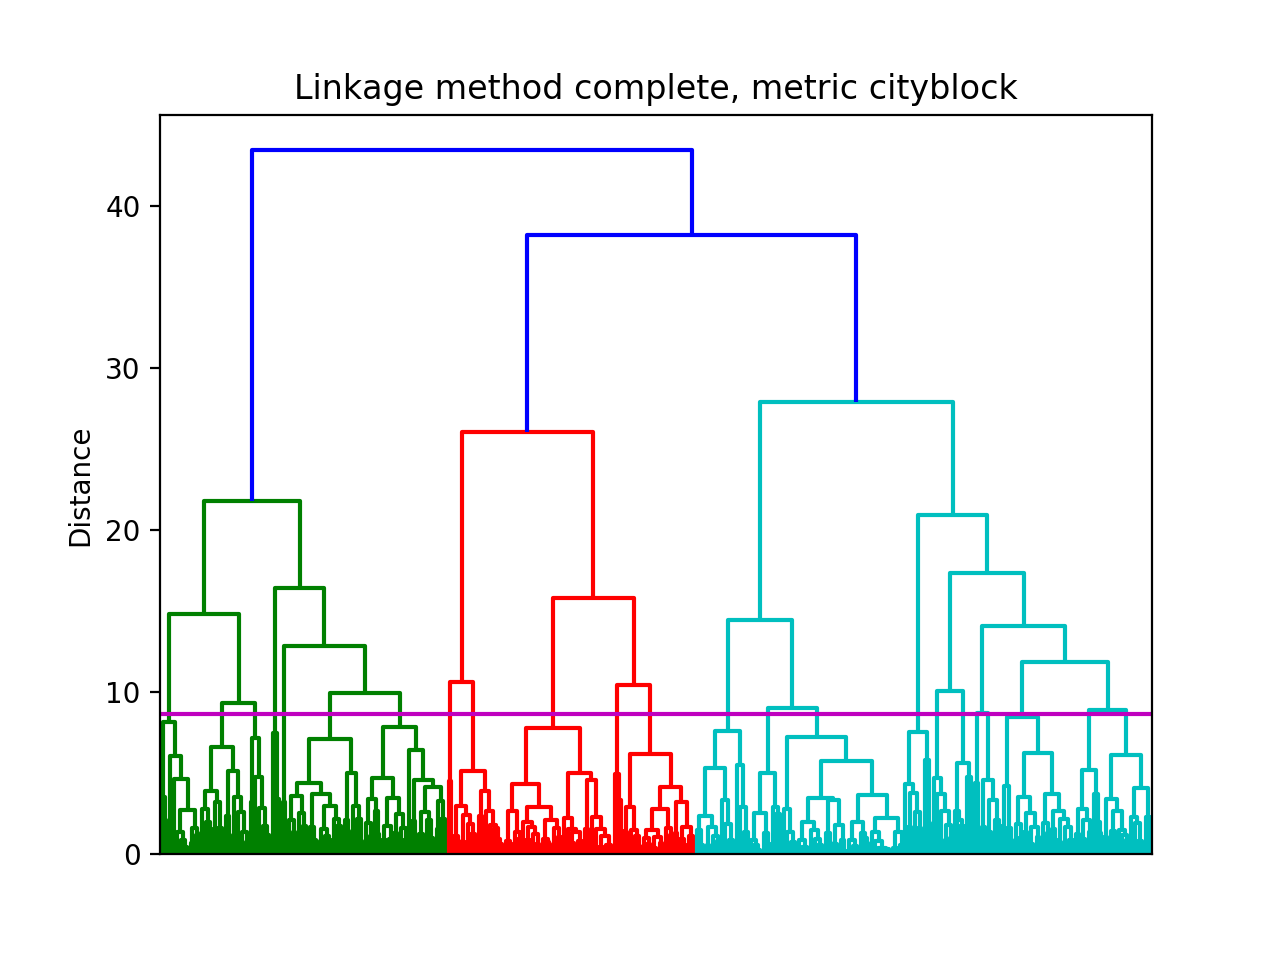

<IPython.core.display.Javascript object>


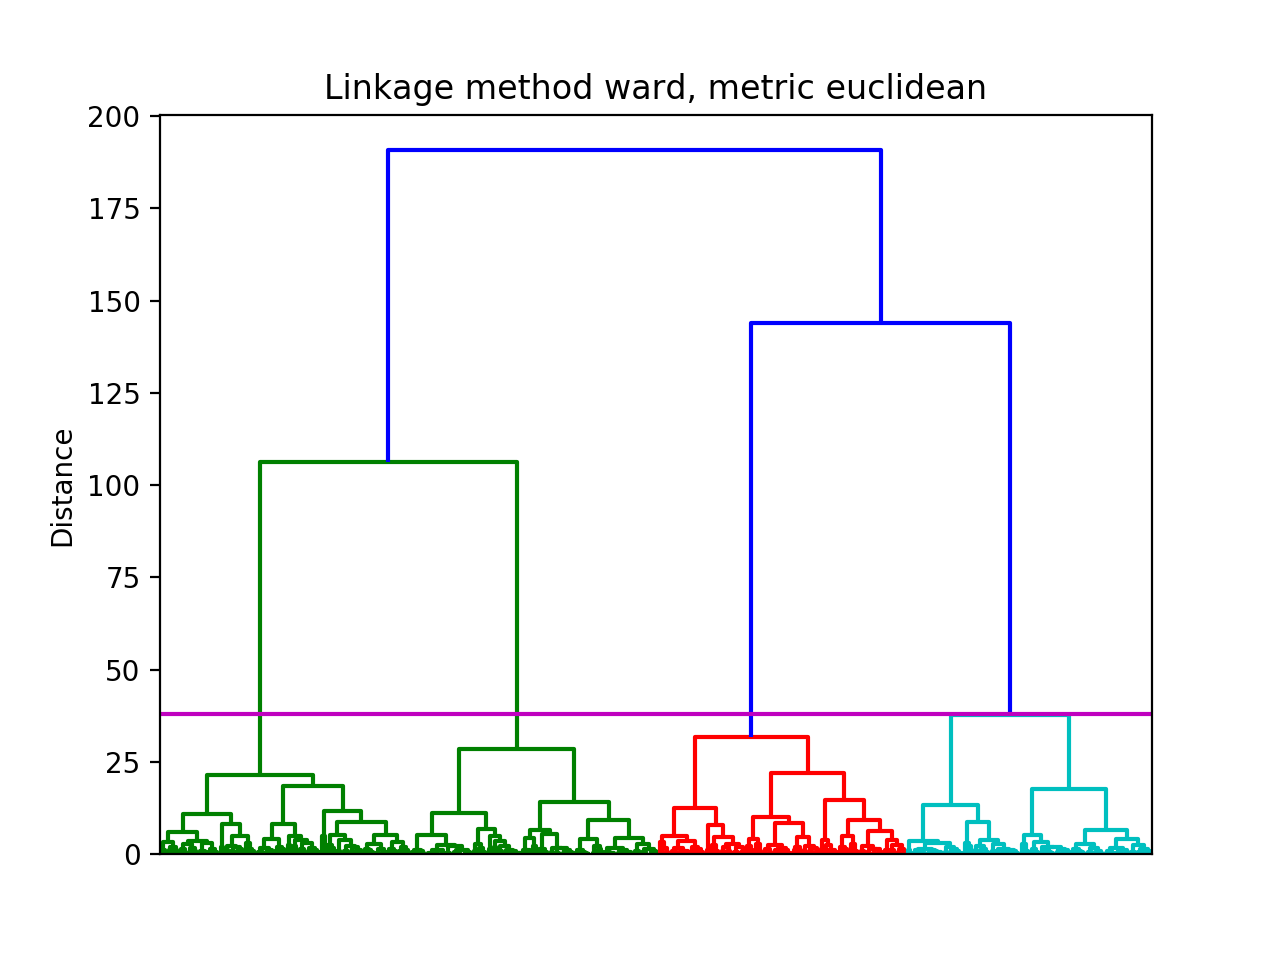

In [38]:
for i, j in enumerate(clustering):
    plt.figure(i+1)
    dendrogram(j,no_labels=True)
    max_d = 0.2*j[-1,2]
    plt.hlines(max_d,0,5000,colors="m")
    plt.title("Linkage method %s, metric %s" % (prods[i][0],prods[i][1]))
    plt.ylabel("Distance")

The aim of trying different linkage methods with different metrics here is to see what the minimum distance with respect to the total distance needed by the linkage method and metric is which gives the desired number of clusters. For data in which the number of clusters is unknown, the goal of the dendrogram is to see where there is a large increase in distance in forming clusters as this indicates the linkage of clusters that should be distinct.

Once you have used the dendrogram to identify the number of clusters in the data, use the [`fcluster`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html) function to define your clusters and plot them with a different colour representing each label. Try this for each of the combinations of linkages and metrics you done previously as this will show more clearly the correct combination to choose.

<IPython.core.display.Javascript object>


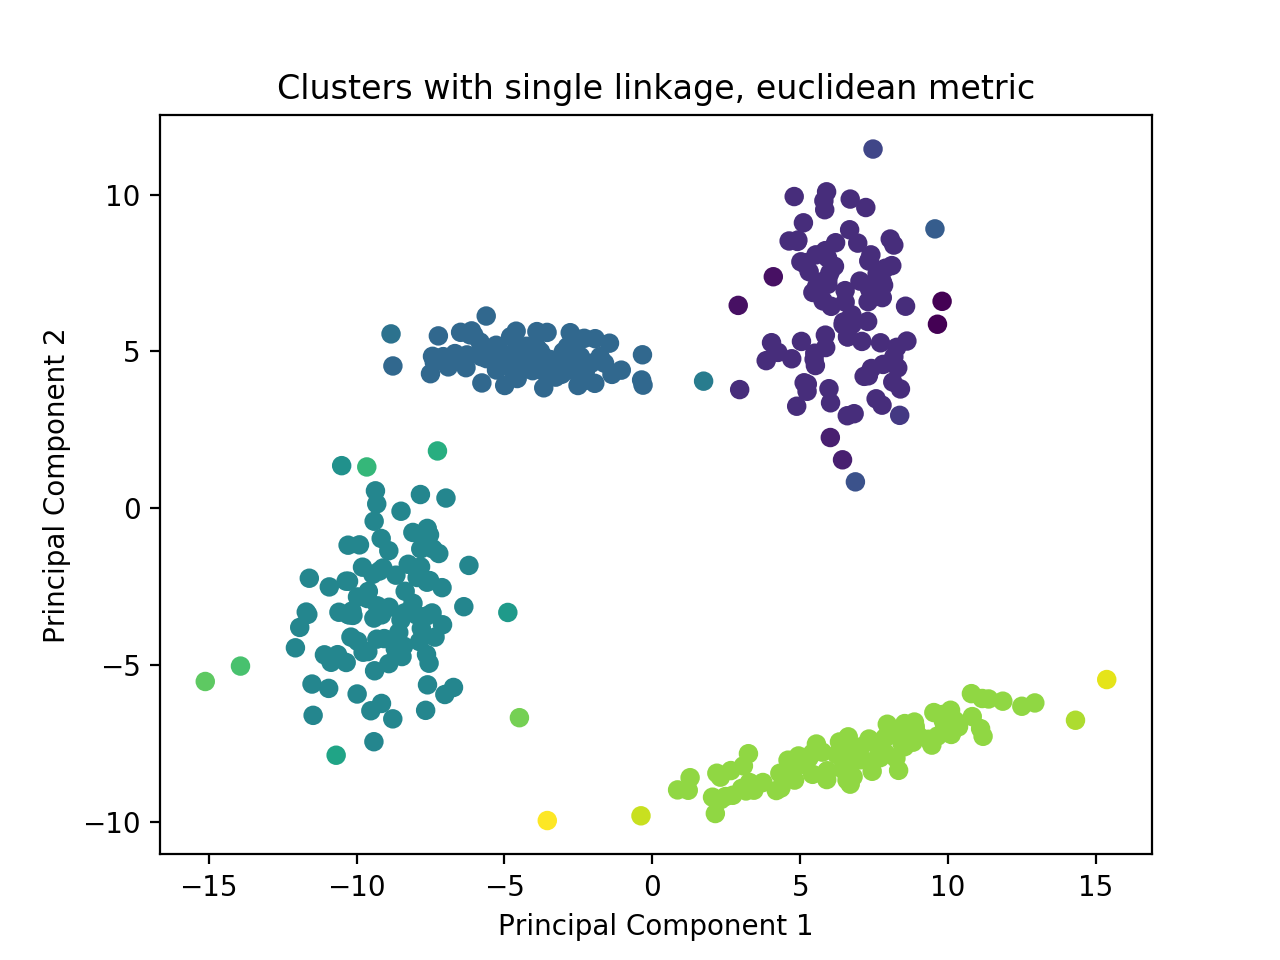

<IPython.core.display.Javascript object>


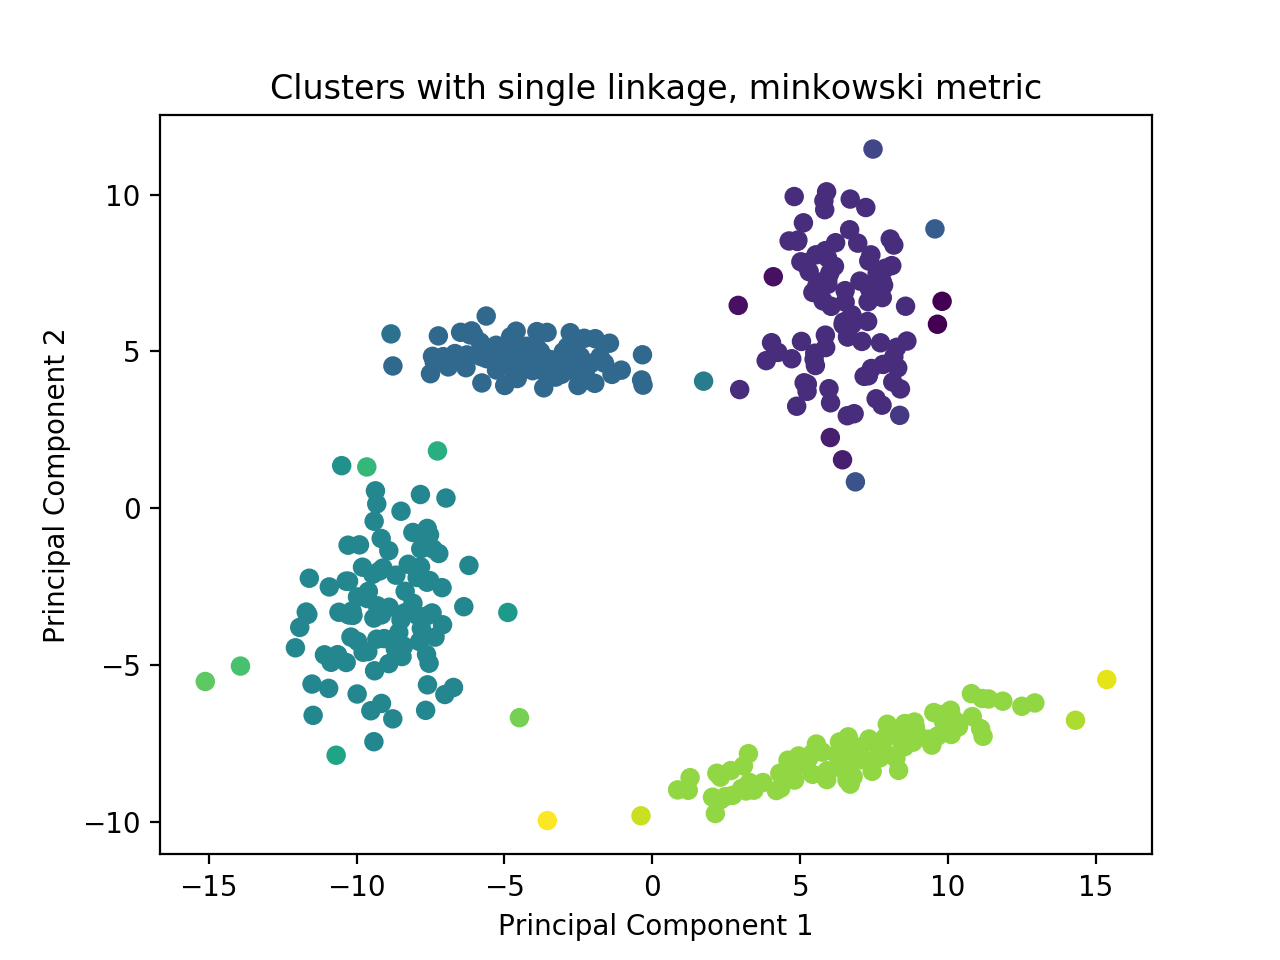

<IPython.core.display.Javascript object>


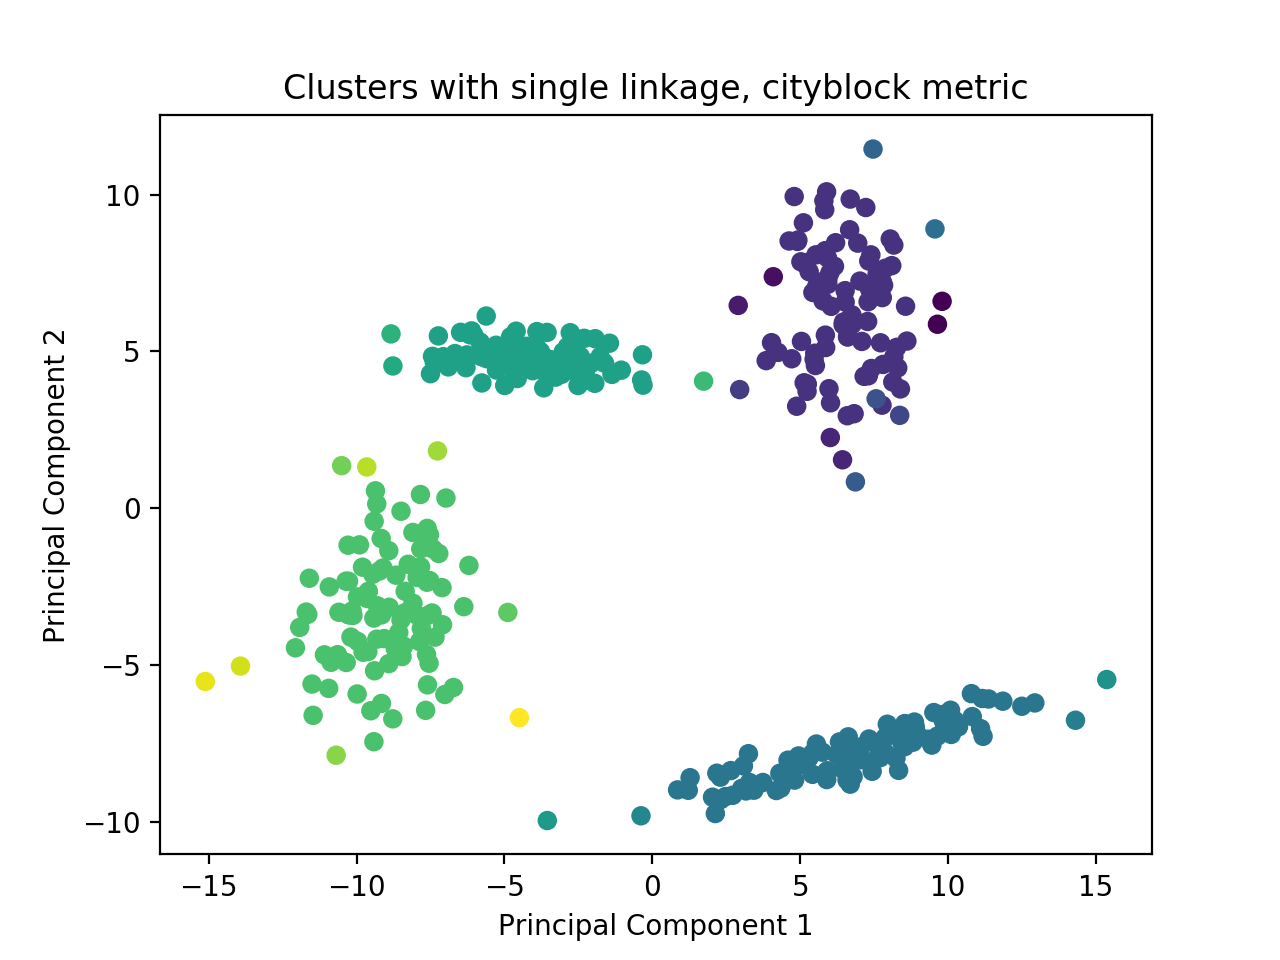

<IPython.core.display.Javascript object>


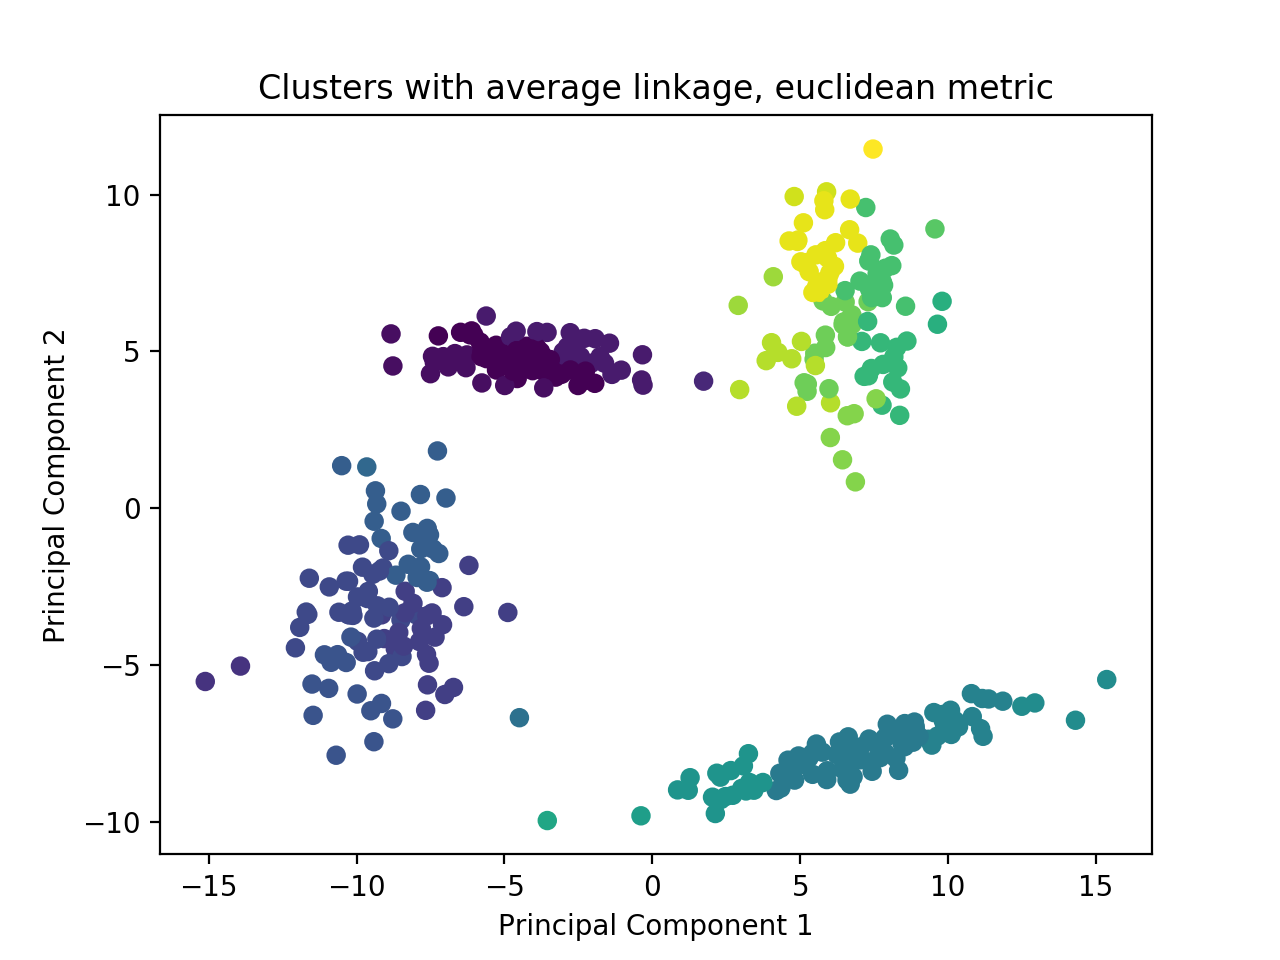

<IPython.core.display.Javascript object>


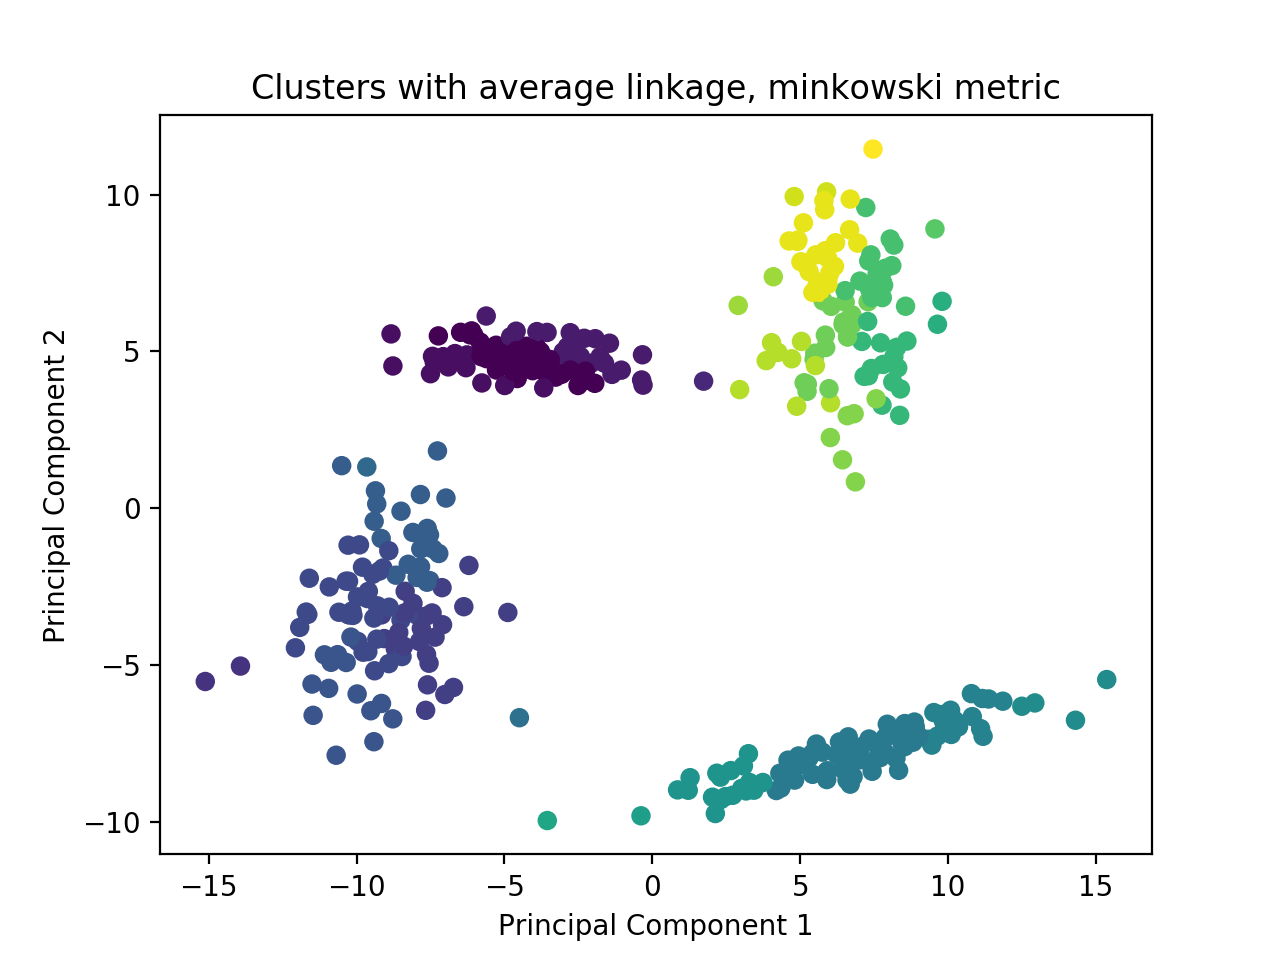

<IPython.core.display.Javascript object>


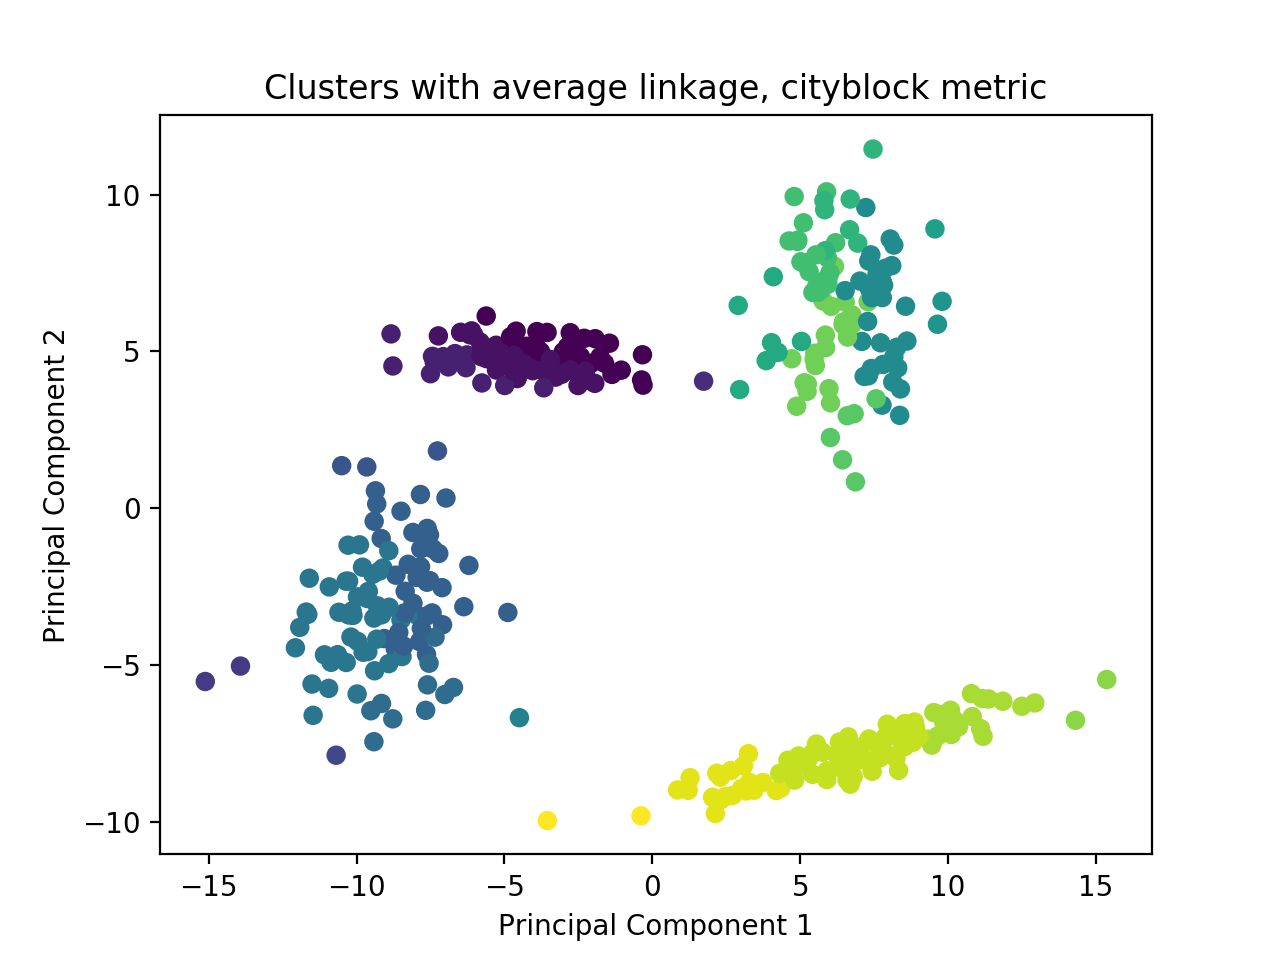

<IPython.core.display.Javascript object>


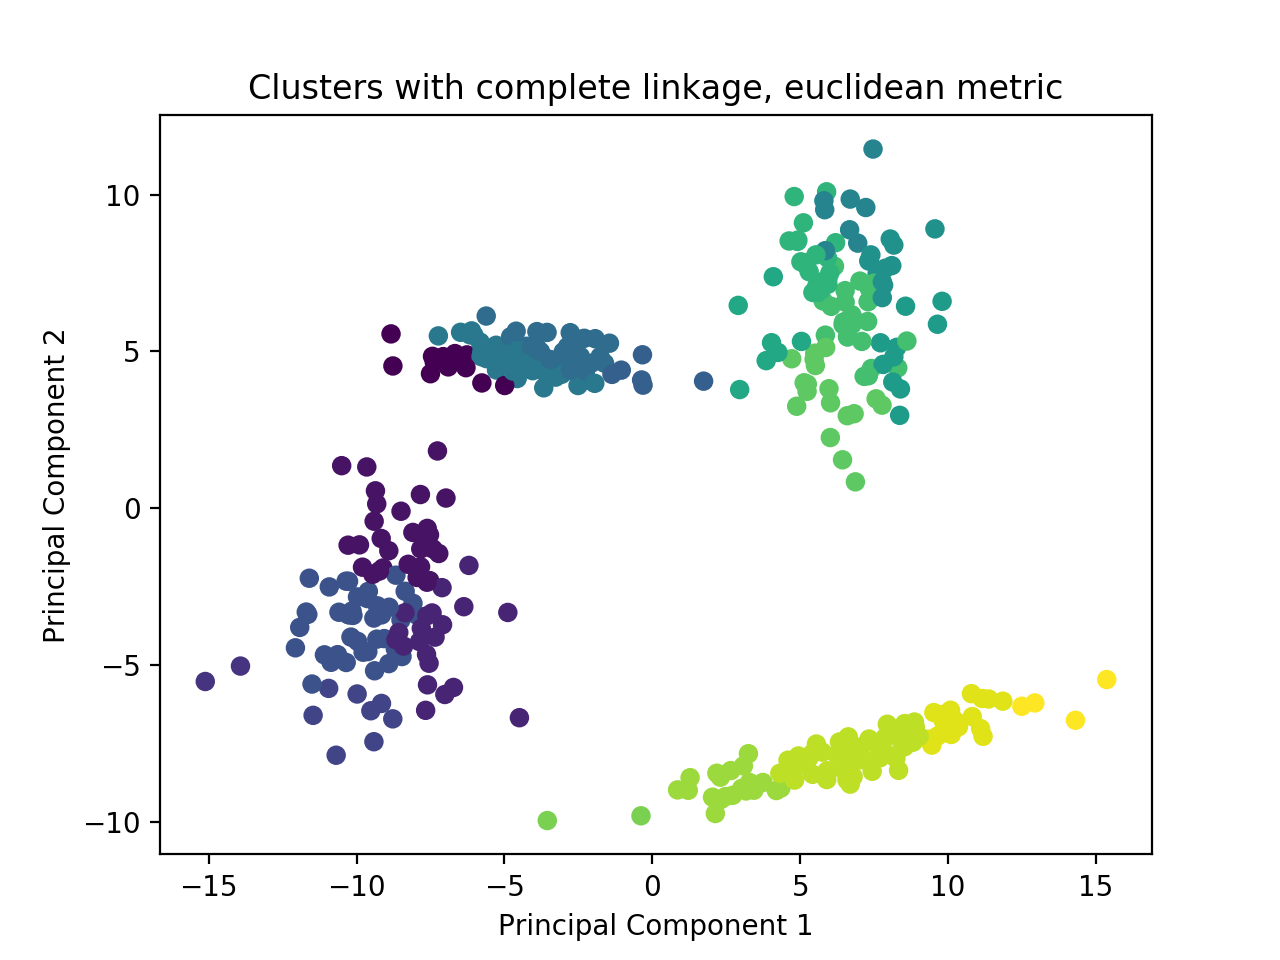

<IPython.core.display.Javascript object>


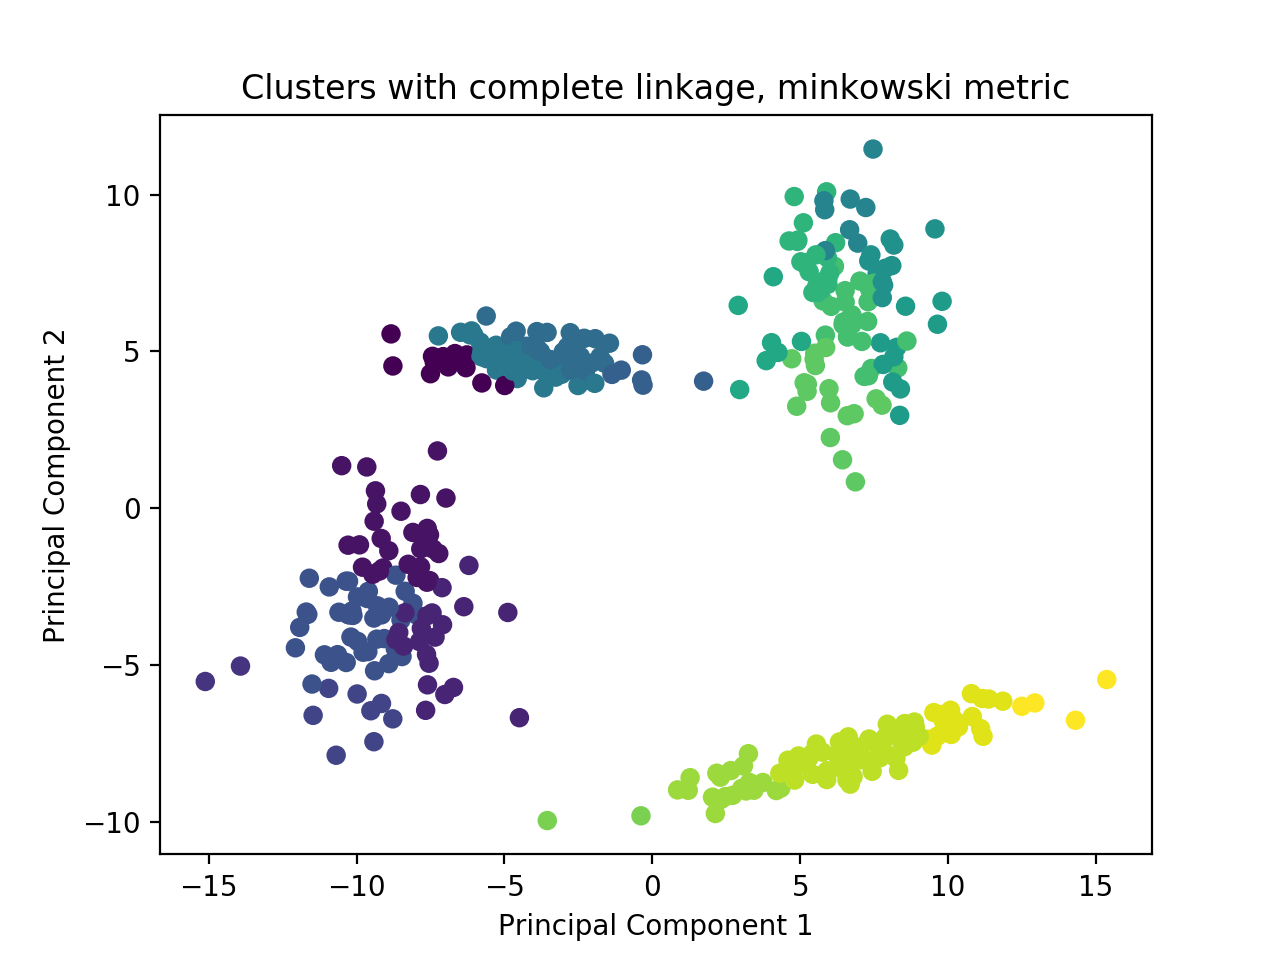

<IPython.core.display.Javascript object>


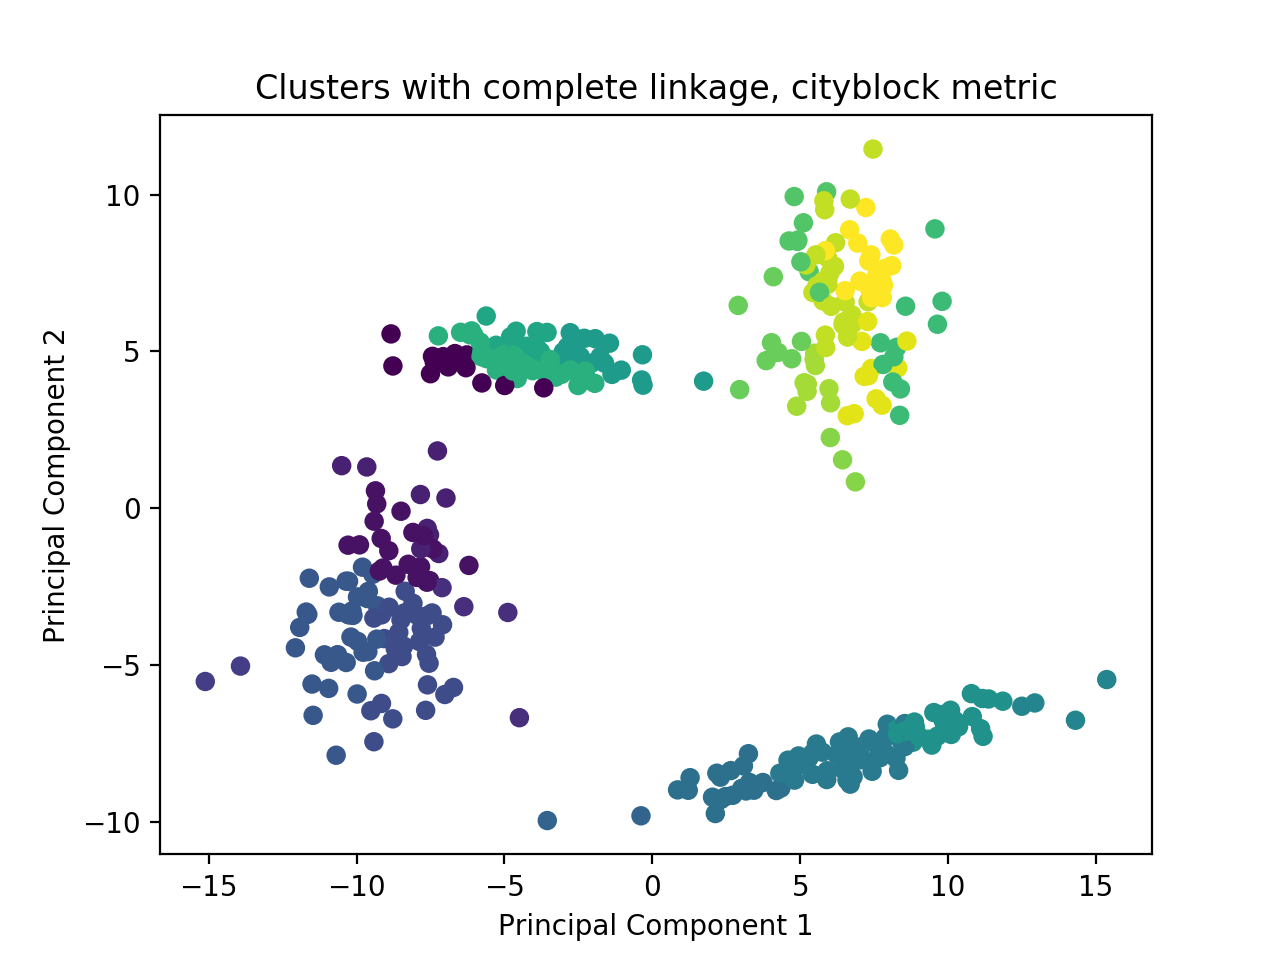

<IPython.core.display.Javascript object>


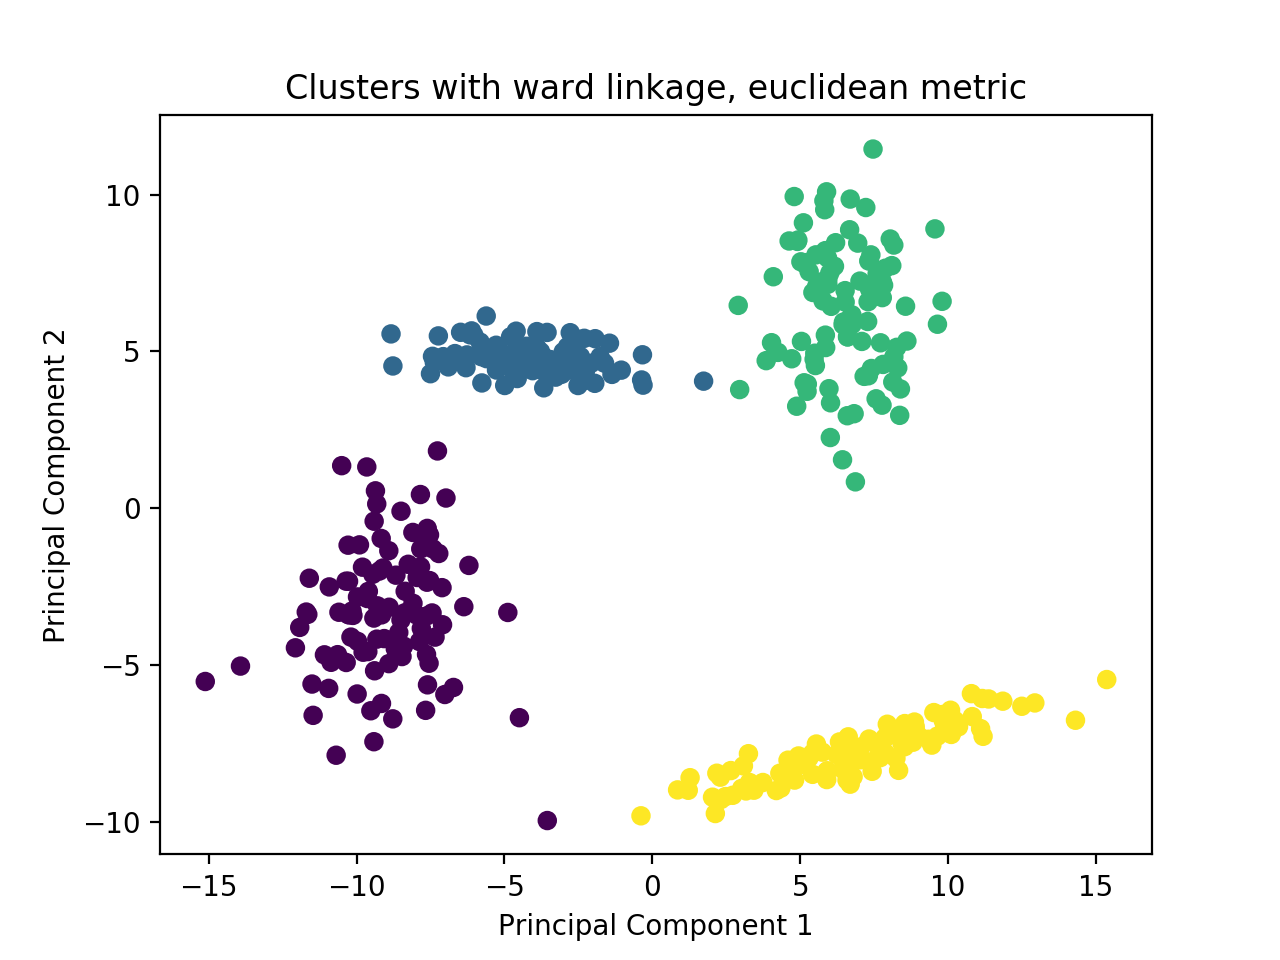

In [39]:
for i, j in enumerate(clustering):
    max_d = 0.2 * j[-1,2]
    clusters = fcluster(j,max_d,criterion="distance")
    plt.figure(i+1)
    plt.title("Clusters with %s linkage, %s metric" % (prods[i][0],prods[i][1]))
    plt.scatter(data_reduced[:,0],data_reduced[:,1],c=clusters)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")

**Questions to be answered:**

1. How do you use a dendrogram to determine the number of clusters of in a dataset?
2. How can you use a dendrogram to determine the right linkage method/metric to be used for hierarchical clustering?

## Exercise 4: Clustering with PCA

There are many different clustering techniques with K-means and agglomerative being the most simple and easy to use with agglomerative being the most effective (in my opinion). However, there are ways to identify clusters in the data without using a clustering algorithm. This is what the following example is for.

After performing PCA on our original data, we can take the two most important principal components and plot the data. From here we cans see the clusters in the data clearly, however what if we only wanted to express our data in terms of one of the two of these principal components. Would we still be able to see the clusters?

To do this, we plot [histograms](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) of the data projected onto 1D which shows how the data is spread out over these principal components.

<IPython.core.display.Javascript object>


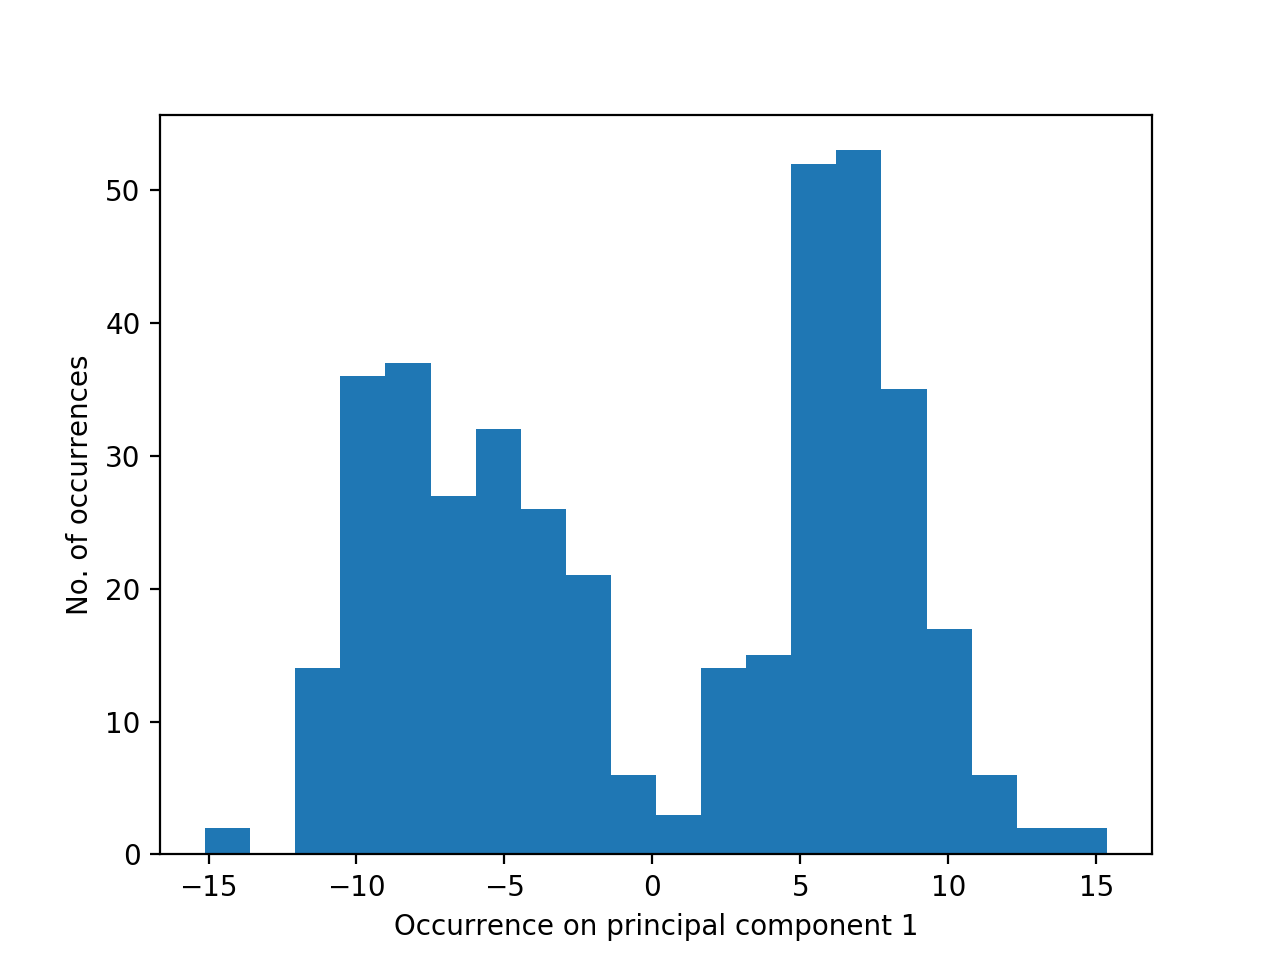

<IPython.core.display.Javascript object>


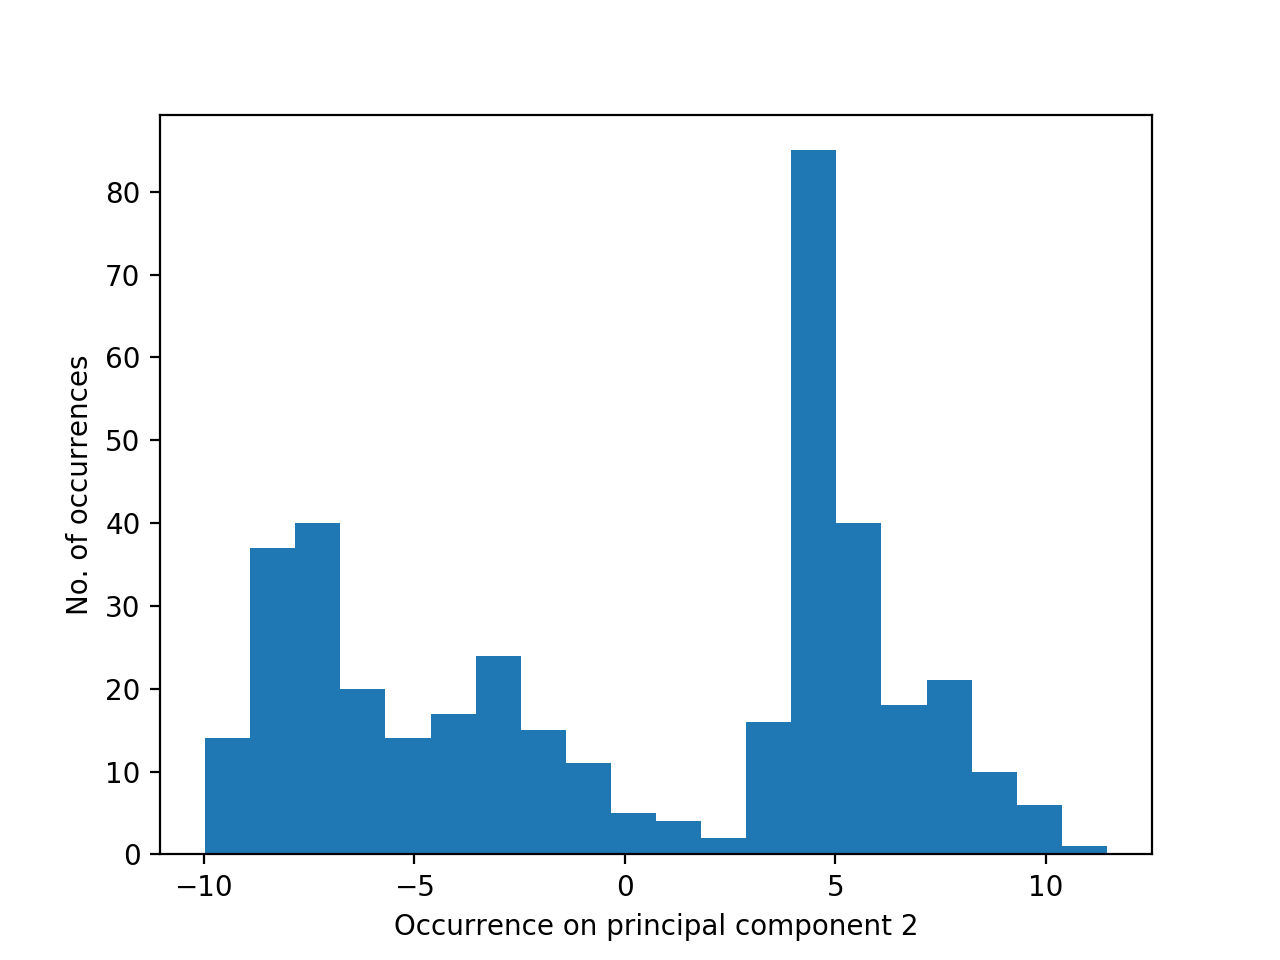

Text(0.5, 0, 'Occurrence on principal component 2')

In [40]:
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data)
plt.figure(1)
plt.hist(data_reduced[:,0],bins=20)
plt.ylabel("No. of occurrences")
plt.xlabel("Occurrence on principal component 1")
plt.figure(2)
plt.hist(data_reduced[:,1],bins=20)
plt.ylabel("No. of occurrences")
plt.xlabel("Occurrence on principal component 2")

**Questions to be answered:**

1. How many clusters do you see when projecting the data onto one principal component?
2. Is PCA a suitable algorithm for clustering in the case of this data or should we use a different method?
3. Can you think of a dataset where this kind of clustering would work?

## Exercise 5: Random Forest Regression

This next exercise is to use a random forest approach to make estimations about a dataset. Random forests are collections of decision trees that are applied to the data. In classification, the results of these decision trees is then put to a majority vote between the trees to give the classification. In regression, each decision tree will come up with a prediction for the variable and the forest will take an average of these to get the overall prediction from the random forest.

We will generate a dataset described by 2 features and fit a random forest regressor to it to see how well points are predicted.

In [48]:
X, y = make_regression(n_samples=500,n_features=2,n_informative=2,random_state=0)

Thus we are trying to learn a function that is

$$ y = f(x_{1}, x_{2}) $$

where $X = (x_{1}, x_{2})$.

In [50]:
rf = RandomForestRegressor(n_estimators=100,max_depth=2,random_state=0)
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [51]:
rf.score(X,y)

0.7494126798996155